<div style=" background-color: RGB(200,10,0);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Partie 2: Clustering et visualisations
</h2>
</div>

<div style=" background-color: RGB(200,10,10);" >
    
# Contexte: 
**L'entreprise Lapage souhaite évaluer sa librairie en ligne après deux ans d'activité afin d'identifier ses forces, ses faiblesses et les comportements des clients. Ces informations seront utilisées pour décider de la création d'offres spécifiques, l'adaptation des prix, etc.**

# Plan d'étude:     


</div>

<div style="background-color: RGB(200,10,10) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données</a> 
</div>

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des librairies Pandas, Matplotlib, Numpy et Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



#Importer les packages de CAH (Classification Ascendante Hiérarchique)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#Importer les packages Kmeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import statsmodels.api as sm
import scipy.stats as st



<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); ">1.2 - Chargement des fichiers CSV </h3>
</div>

In [2]:
#Importation du fichier CSV "DispoAlim_Pop2017" qui a été généré dans le précédent Notebook "Partie 1: Préparation_nettoyage_analyse_exploratoire"
DispoAlim_Pop2017=pd.read_csv('DispoAlim_Pop2017.csv',index_col=0)
DispoAlim_Pop2017

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
Zone,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16
...,...,...,...,...,...,...,...
Égypte,1.0,110.0,96442590.0,1917.05,113.85,3959.4415,1.587590e+17
Émirats arabes unis,94.0,433.0,9487200.0,42522.38,199.19,3988.8191,5.124985e+16
Équateur,0.0,0.0,16785360.0,6246.40,208.50,1897.9459,3.767894e+16


<div style="background-color: RGB(200,10,10) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff;">Etape 2 - Classification ascendante hiérarchique et visualisation avec un dendrogramme 
<div>

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 2.1 - Matrice de distance</h3>
</div>

In [3]:
Z = linkage(DispoAlim_Pop2017, method="ward", metric='euclidean')
pd.DataFrame(Z)

,0,1,2,3
0,45.0,50.0,3.577054e+09,2.0
1,81.0,122.0,1.590196e+12,2.0
2,72.0,104.0,6.725162e+12,2.0
3,33.0,88.0,7.761105e+12,2.0
4,38.0,48.0,1.222849e+13,2.0
...,...,...,...,...
126,249.0,255.0,3.128318e+17,104.0
127,254.0,256.0,5.918704e+17,25.0
128,18.0,257.0,1.177684e+18,3.0
129,258.0,259.0,1.366868e+18,129.0


<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 2.2 - Dendrogramme </h3>
</div>

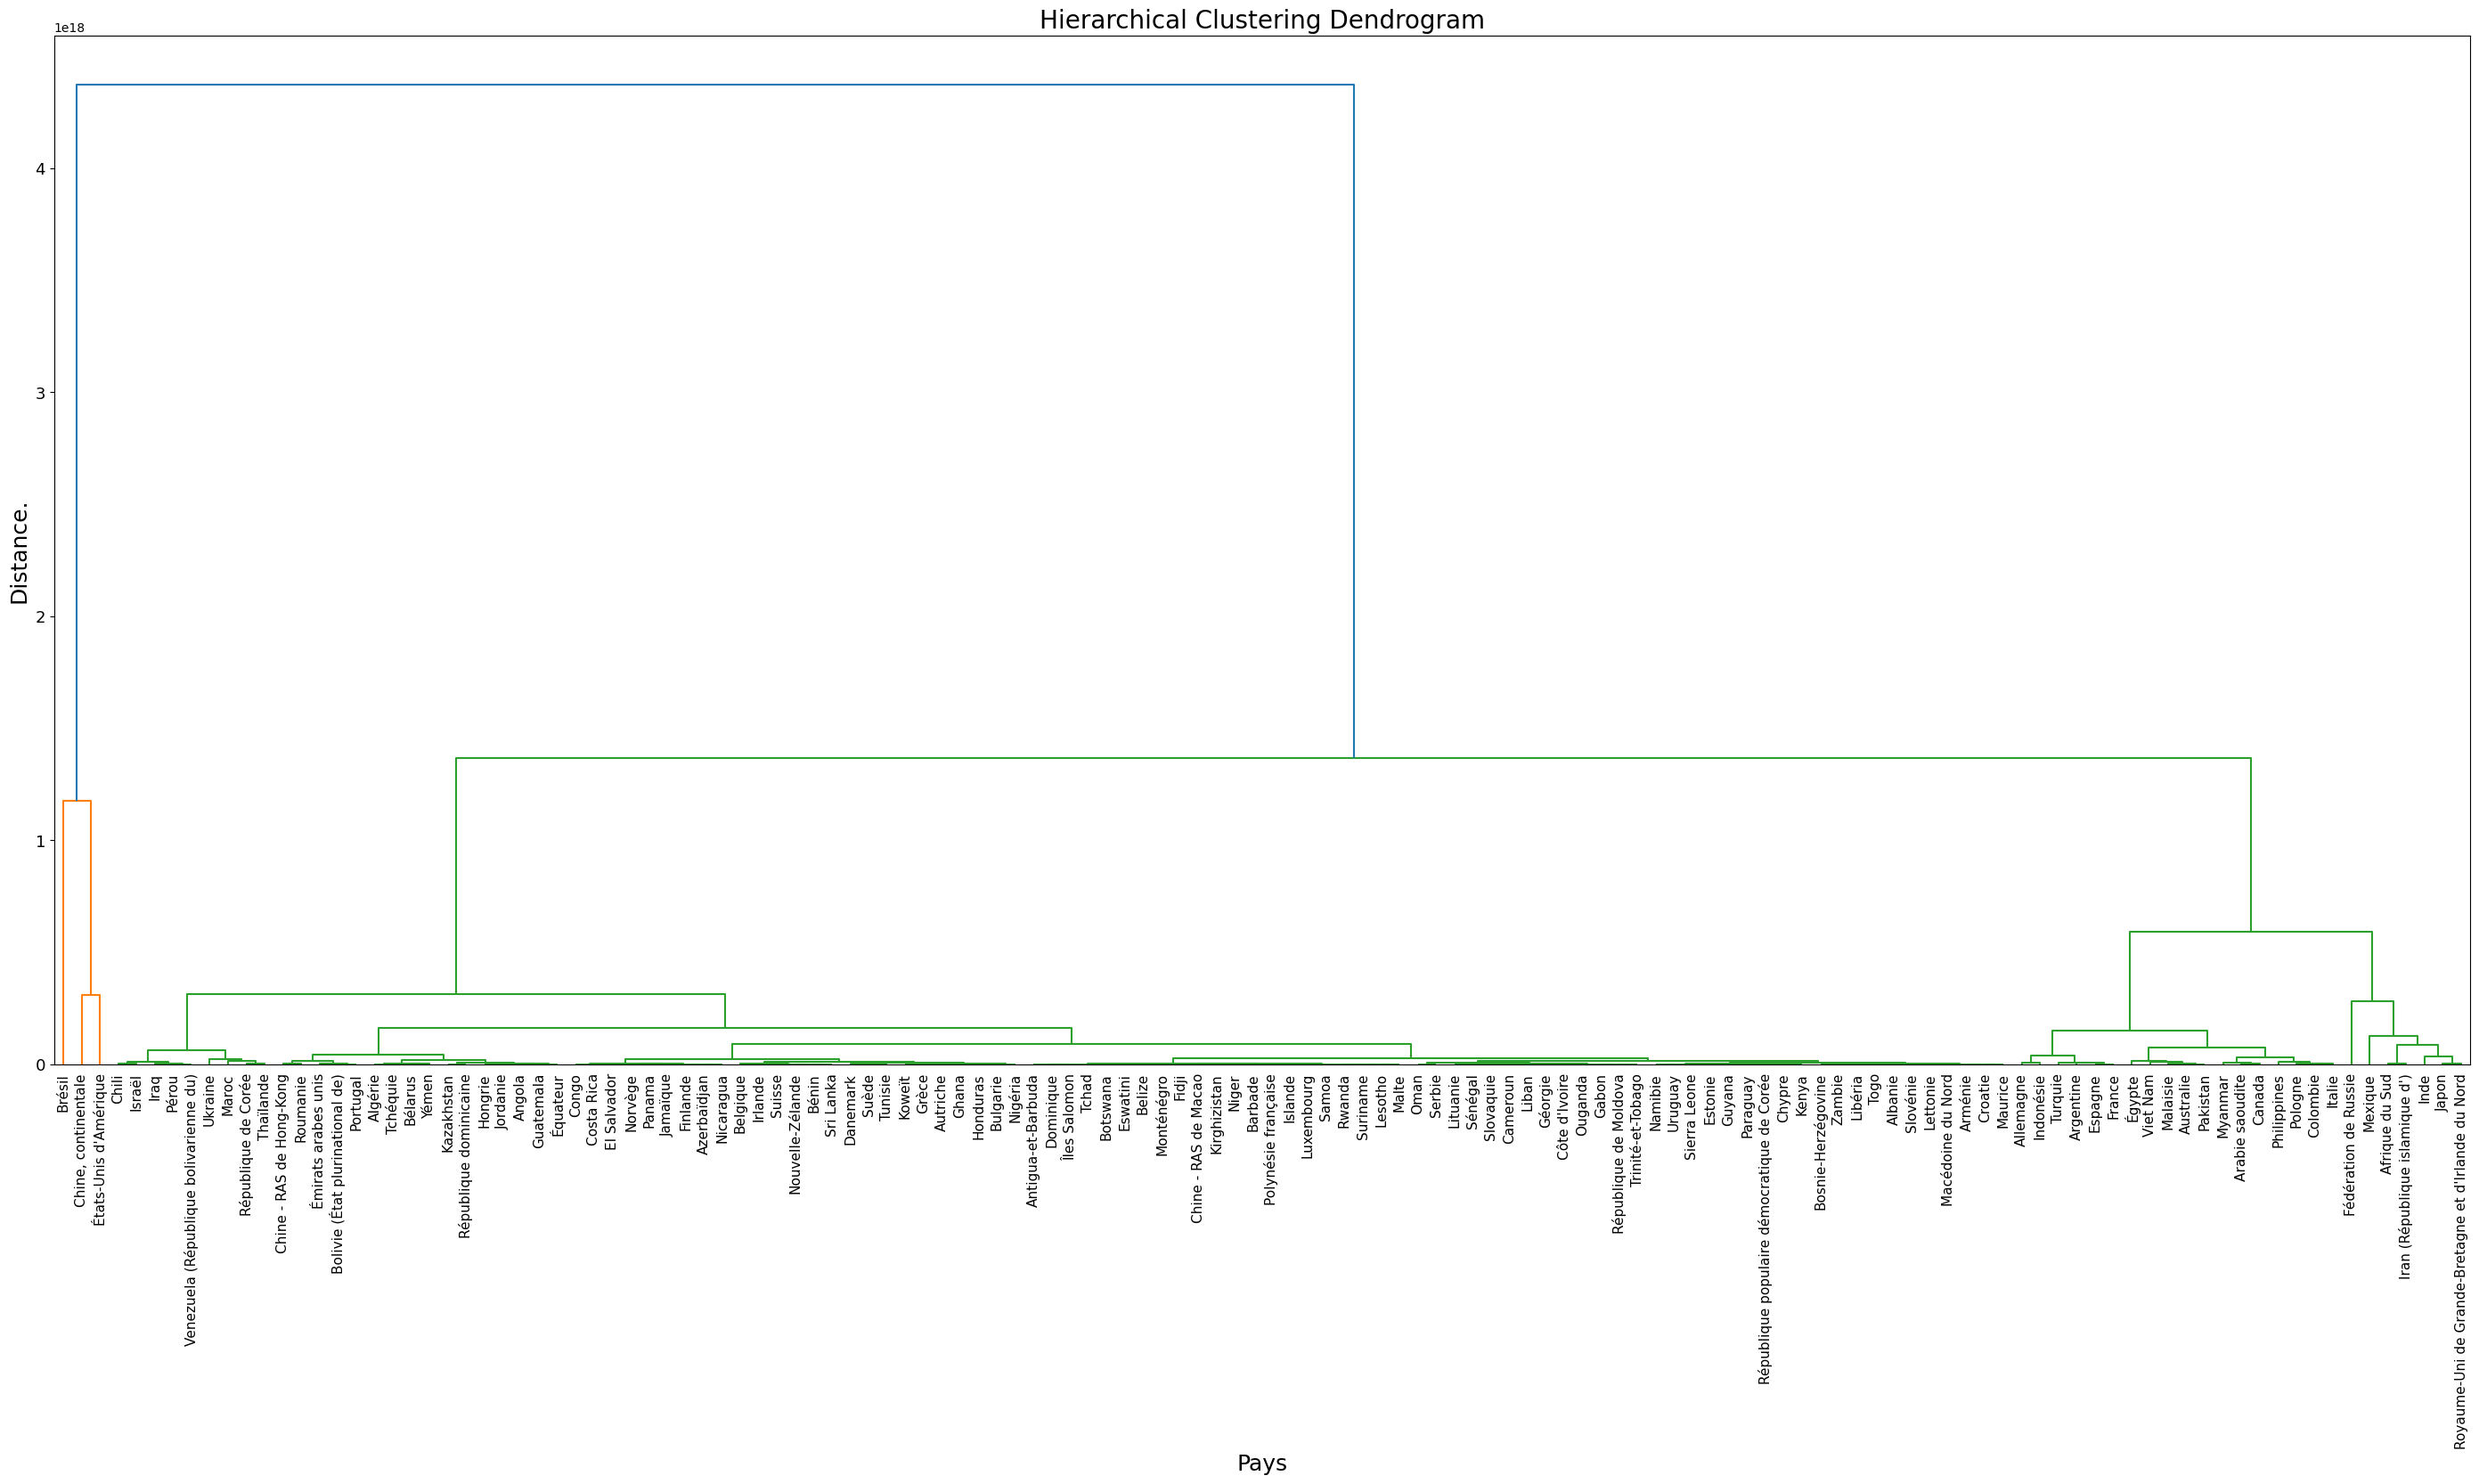

In [4]:
# generer le dendrogramme 
fig =plt.figure(figsize=(35,15))
dendrogram = dendrogram (linkage(DispoAlim_Pop2017, method='ward'), labels = DispoAlim_Pop2017.index,orientation = "top",p=10)
plt.title("Hierarchical Clustering Dendrogram",fontsize =20)
plt.xticks(fontsize =11)
plt.yticks(fontsize =13)
plt.xlabel("Pays",fontsize = 18)
plt.ylabel("Distance.",fontsize = 18)
plt.show()

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 2.3 - Déterminer les clusters </h3>
</div>

**On instancie un cluster**

In [5]:
# Utiliser un "AgglomerativeClustering" pour déterminer le contenu des clusters
cah = AgglomerativeClustering(n_clusters=3, linkage="ward")

In [6]:
cah.fit(DispoAlim_Pop2017)


AgglomerativeClustering(n_clusters=3)

In [7]:
cah.labels_

array([1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2],
      dtype=int64)

In [8]:
dd = {i:j for i,j in enumerate(list("abcde"))}
labels = [dd[i] for i in cah.labels_]
labels[:10]

['b', 'c', 'c', 'b', 'c', 'c', 'b', 'b', 'c', 'b']

In [9]:
DispoAlim_Pop2017["cluster"] = labels
DispoAlim_Pop2017

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster
Zone,,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17,b
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15,c
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16,c
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17,b
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16,c
...,...,...,...,...,...,...,...,...
Égypte,1.0,110.0,96442590.0,1917.05,113.85,3959.4415,1.587590e+17,b
Émirats arabes unis,94.0,433.0,9487200.0,42522.38,199.19,3988.8191,5.124985e+16,c
Équateur,0.0,0.0,16785360.0,6246.40,208.50,1897.9459,3.767894e+16,c


In [10]:
DispoAlim_Pop2017v2=DispoAlim_Pop2017.reset_index()

# Créez un dictionnaire pour stocker les pays par cluster
clusters_dict = {}

# Groupement des données par cluster
clustered_data = DispoAlim_Pop2017v2.groupby('cluster')

# Remplissez le dictionnaire avec les pays par cluster
for cluster, group in clustered_data:
    countries = list(group['Zone'])
    clusters_dict[f'Cluster {cluster}'] = countries

# Affichage des clusters sous forme de listes
for cluster, countries in clusters_dict.items():
    print(f'{cluster}: {countries}')
    print()

Cluster a: ['Brésil', 'Chine, continentale', "États-Unis d'Amérique"]

Cluster b: ['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Canada', 'Colombie', 'Espagne', 'France', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pologne', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Turquie', 'Viet Nam', 'Égypte']

Cluster c: ['Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Barbade', 'Belgique', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Bélarus', 'Bénin', 'Cameroun', 'Chili', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'Gabon', 'Ghana', 'Grèce', 'Guatemala', 'Guyana', 'Géorgie', 'Honduras', 'Hongrie',

In [11]:
#Informations préalables sur les clusters qui pourraient 
DispoAlim_Pop2017v2.groupby("cluster")["Exportations - Quantité Milliers de tonnes","Importations - Quantité Milliers de tonnes","Population totale","Produit Intérieur Brut","Prix Déflateurs($)","Émissions CO2 (kt) Transport alim","Dispo de protéines en qtité (Milliers de tonnes/pop/an)"] .mean()

C:\Users\bello\AppData\Local\Temp\ipykernel_83484\499519886.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DispoAlim_Pop2017v2.groupby("cluster")["Exportations - Quantité Milliers de tonnes","Importations - Quantité Milliers de tonnes","Population totale","Produit Intérieur Brut","Prix Déflateurs($)","Émissions CO2 (kt) Transport alim","Dispo de protéines en qtité (Milliers de tonnes/pop/an)"] .mean()


,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
cluster,,,,,,,
a,2830.333333,192.666667,6.513135e+08,25895.153333,208.406667,38822.011333,1.869411e+18
b,163.080000,280.160000,1.342126e+08,18093.194800,198.552800,9291.775676,2.368119e+17
c,37.028846,59.067308,1.292871e+07,15654.624231,203.555288,1009.591783,2.152388e+16


**<span style="color:blue">  
 Le cluster "a" présente un potentiel élevé en termes de capacité de production et de demande potentielle, mais il doit faire face à des préoccupations environnementales et à des prix élevés.
Le cluster "b" a des exportations compétitives mais dépend des importations et a une population limitée.
Le cluster "c" a des émissions de CO2 faibles mais des exportations limitées.<span>**

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 2.4 - Graphiques bivariés </h3>
</div>

<Figure size 1000x1000 with 0 Axes>

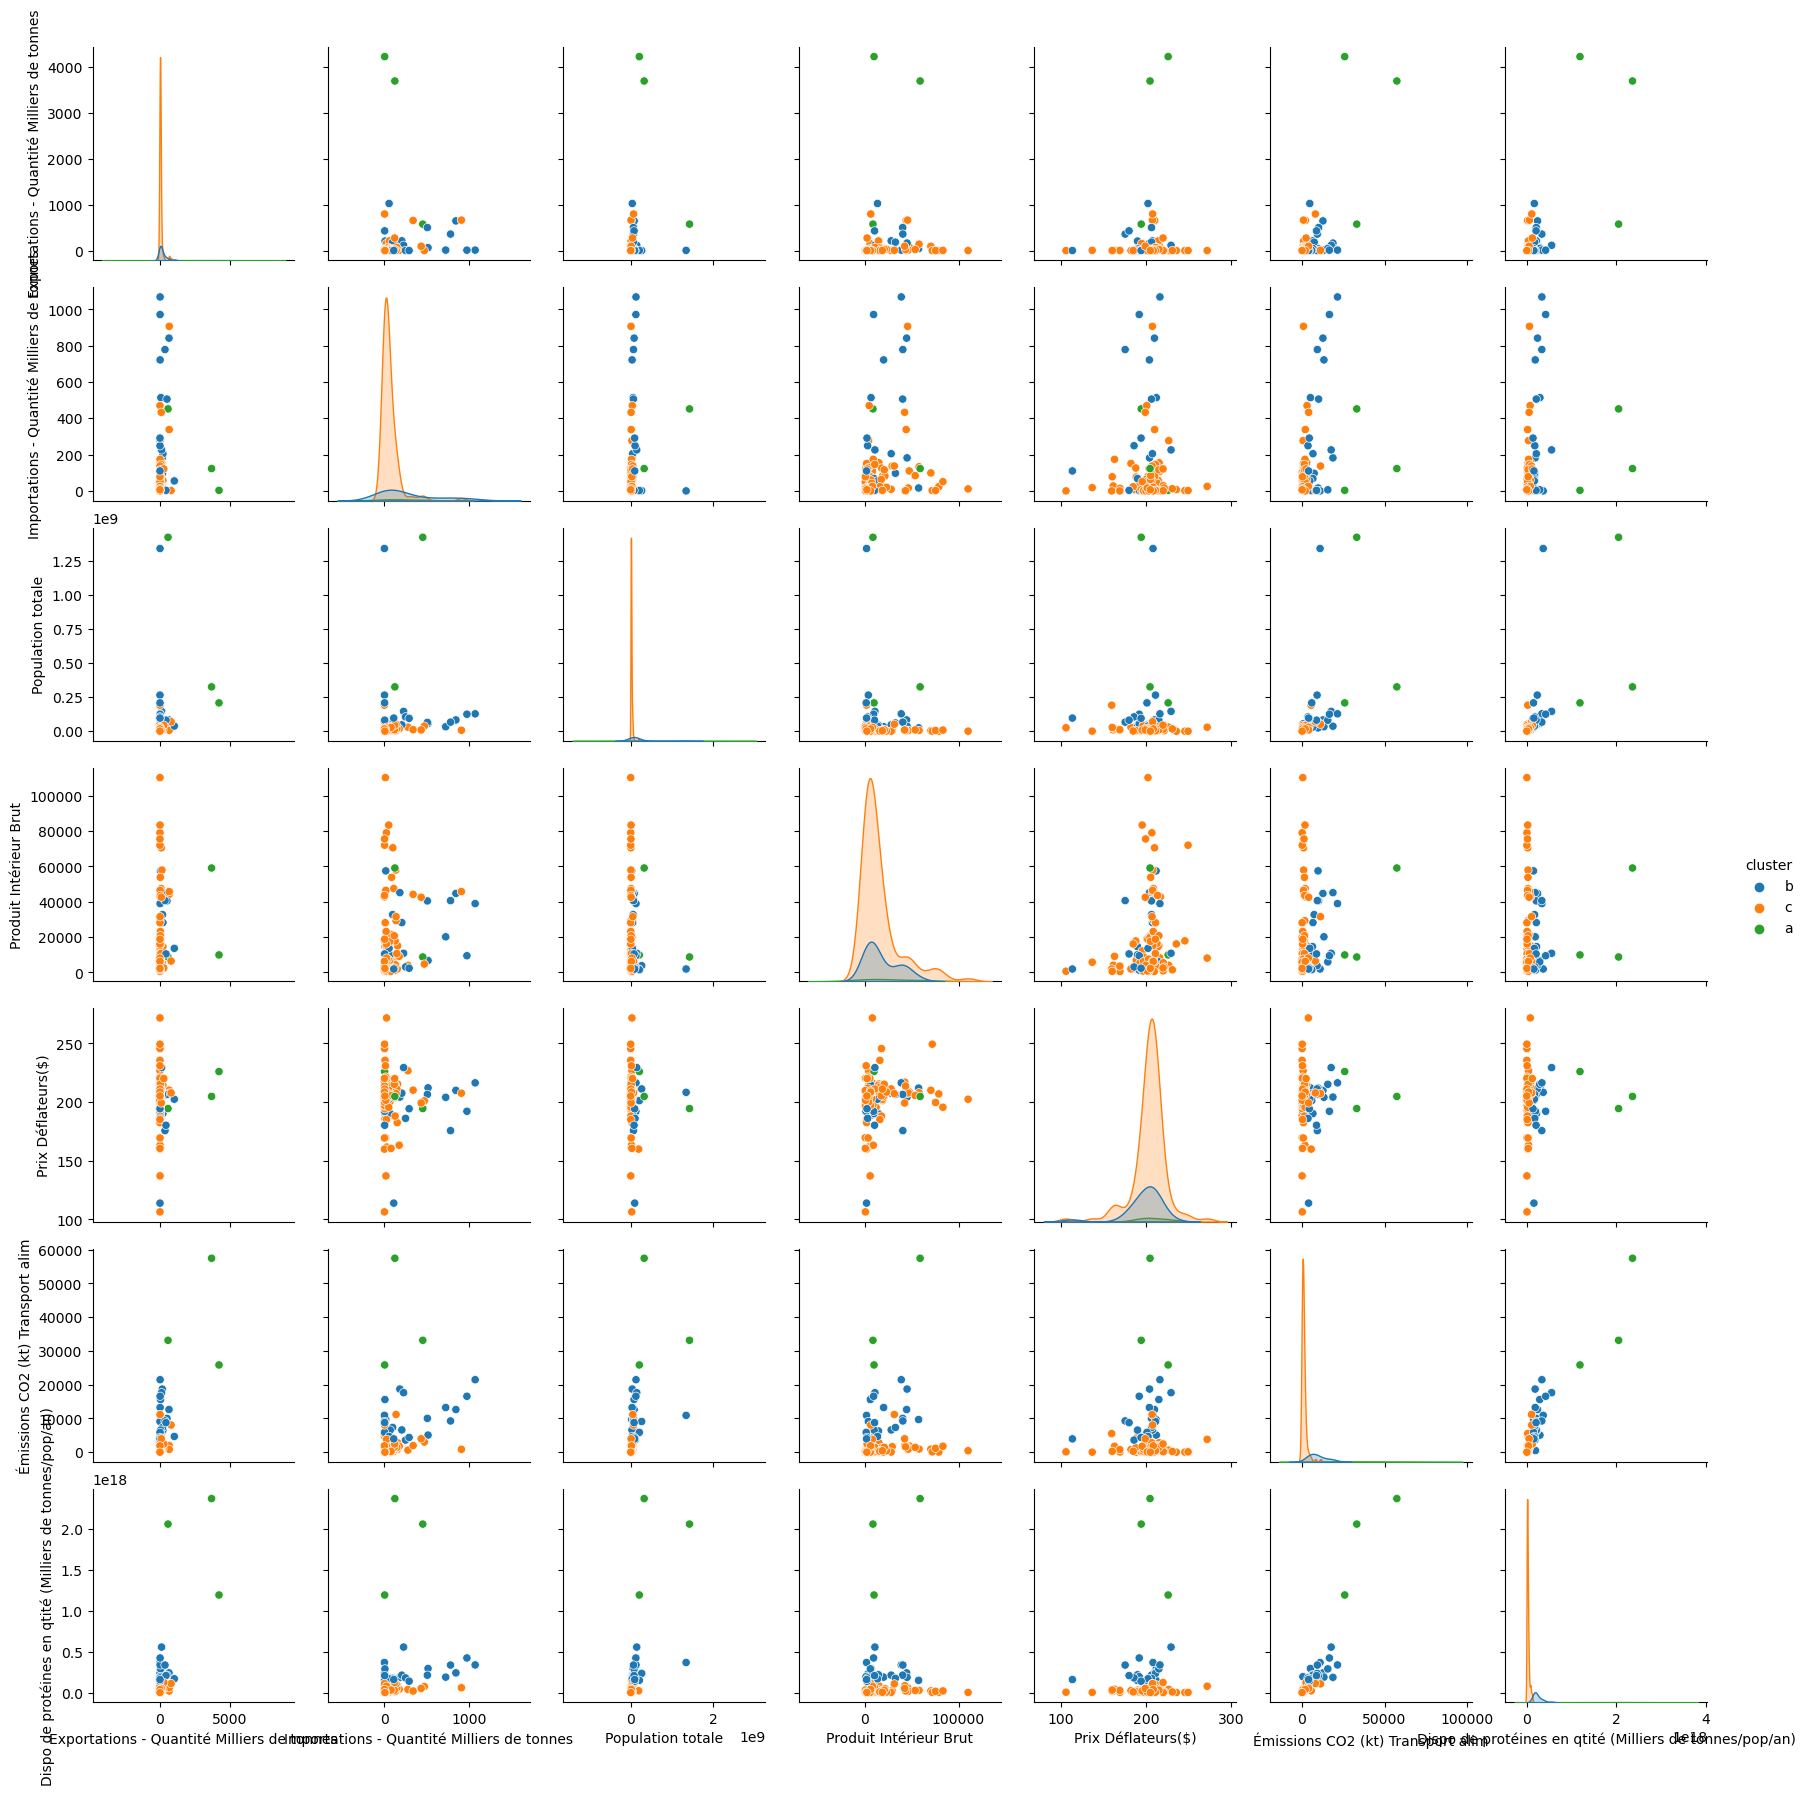

In [12]:
# Graphiques bivariés    
fig =plt.figure(figsize=(10,10))
sns.pairplot(DispoAlim_Pop2017, hue="cluster")
plt.show()

<div style="background-color: RGB(200,10,10) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff;">Etape 3 - Méthode des K-mean <div>

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 3.1 - Calcul de la valeur de l'inertie </h3>
</div>

In [13]:
DispoAlim_Pop2017kmeans=pd.read_csv('DispoAlim_Pop2017.csv',index_col=0)

**<span style="color:blue"> Pour chaque nombre de clusters, on entraîne un k-means, et on enregistre la valeur de l'inertie :<span>**

In [14]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(DispoAlim_Pop2017kmeans)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\bello\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**<span style="color:blue"> On peut ensuite faire un graphique pour constater la "cassure" dans la courbe. On affiche en  `x`  le nombre de clusters, la variable `k_list` et en  y  la liste des inerties intraclasses, la variable  `inertia`.<span>** 

In [15]:
#Afficher la valeur de l'inertie intraclasse
print("La valeur de l'inertie intraclasse :", kmeans.inertia_)

La valeur de l'inertie intraclasse : 3.492969132284635e+34


<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 3.2 - Visualisation du coude </h3>
</div>

**<span style="color:blue"> On utilise la méthode du coude pour visuliser le nombre de clusters adéquate<span>**

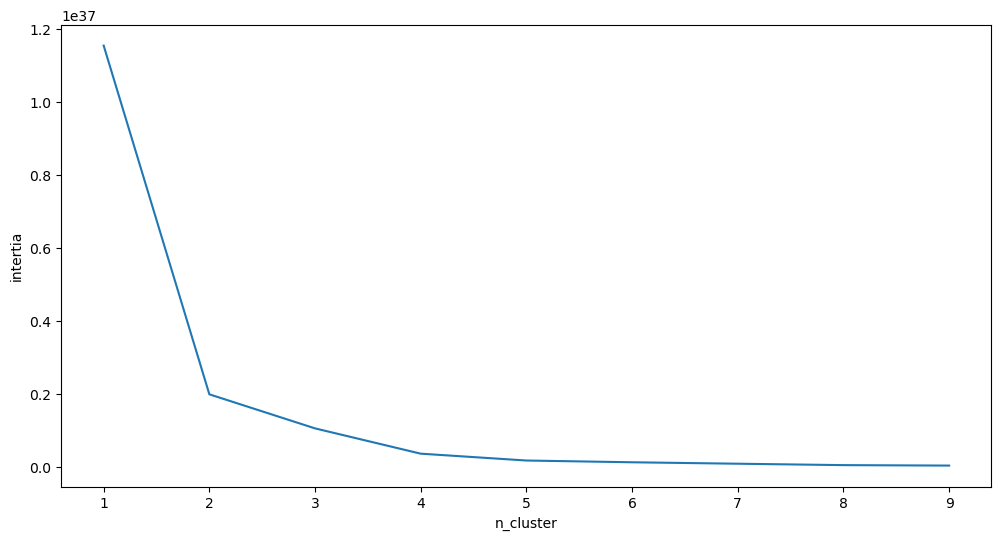

In [16]:
# Faire un graphique pour constater la "cassure" dans la courbe permettant de lier la variance intraclasse au nombre de clusters
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [17]:
print("Voici la liste des inerties intraclasses: ",intertia_list)

Voici la liste des inerties intraclasses:  [1.155339629744238e+37, 1.989131643033664e+36, 1.0549675166771637e+36, 3.614976011052695e+35, 1.7371023187778823e+35, 1.2564089978110076e+35, 8.609730412735755e+34, 4.740806895345994e+34, 3.492969132284635e+34]


**<span style="color:blue"> On choisit donc 3 clusters <span>** 

<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 3.2 - Les clusters avec Kmeans </h3>
</div>

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(DispoAlim_Pop2017kmeans)

KMeans(n_clusters=3)

In [19]:
# On l'entraine : 
kmeans.fit(DispoAlim_Pop2017kmeans)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

array([0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2])

In [20]:
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [21]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'c', 'c', 'a', 'c', 'c', 'a', 'a', 'c', 'a']

In [22]:
DispoAlim_Pop2017kmeans

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
Zone,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16
...,...,...,...,...,...,...,...
Égypte,1.0,110.0,96442590.0,1917.05,113.85,3959.4415,1.587590e+17
Émirats arabes unis,94.0,433.0,9487200.0,42522.38,199.19,3988.8191,5.124985e+16
Équateur,0.0,0.0,16785360.0,6246.40,208.50,1897.9459,3.767894e+16


In [23]:
DispoAlim_Pop2017kmeans["cluster"] = labels


In [24]:
DispoAlim_Pop2017kmeans.groupby("cluster").mean()

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
cluster,,,,,,,
a,163.080000,280.160000,1.342126e+08,18093.194800,198.552800,9291.775676,2.368119e+17
b,2830.333333,192.666667,6.513135e+08,25895.153333,208.406667,38822.011333,1.869411e+18
c,37.028846,59.067308,1.292871e+07,15654.624231,203.555288,1009.591783,2.152388e+16


<div style="border: 5px solid RGB(200,10,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,10,0); "> 3.3 -Analyse des centroïde </h3>
</div>

In [25]:
DispoAlim_Pop2017kmeans["cluster"] = labels
DispoAlim_Pop2017kmeans.head(5)

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster
Zone,,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17,a
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15,c
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16,c
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17,a
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16,c


In [26]:
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids

array([[1.63080000e+02, 2.80160000e+02, 1.34212602e+08, 1.80931948e+04,
        1.98552800e+02, 9.29177568e+03, 2.36811858e+17],
       [2.83033333e+03, 1.92666667e+02, 6.51313457e+08, 2.58951533e+04,
        2.08406667e+02, 3.88220113e+04, 1.86941075e+18],
       [3.70288462e+01, 5.90673077e+01, 1.29287137e+07, 1.56546242e+04,
        2.03555288e+02, 1.00959178e+03, 2.15238826e+16]])

<div style="background-color: RGB(200,10,10) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff;">Etape 4 - Analyse en composante principale <div>

## 4.1. Fractionnement des données (Data Split)

In [27]:
DispoAlim_Pop2017ACP=pd.read_csv('DispoAlim_Pop2017.csv',index_col=0)

In [28]:
#Séparer les données. D'un coté `X` la matrice des données : 
X = DispoAlim_Pop2017ACP.values
X[:5]

array([[6.30000000e+01, 5.14000000e+02, 5.70097600e+07, 6.72393000e+03,
        2.12120000e+02, 5.07415550e+03, 2.93608815e+17],
       [0.00000000e+00, 3.80000000e+01, 2.88417000e+06, 4.52175000e+03,
        2.12600000e+02, 2.93421300e+02, 6.59004003e+15],
       [0.00000000e+00, 2.00000000e+00, 4.13891900e+07, 4.13494000e+03,
        1.90440000e+02, 4.66578690e+03, 2.97608971e+16],
       [6.46000000e+02, 8.42000000e+02, 8.26584100e+07, 4.46702200e+04,
        2.09960000e+02, 1.26477592e+04, 2.40155744e+17],
       [0.00000000e+00, 2.77000000e+02, 2.98167700e+07, 4.04268000e+03,
        2.26670000e+02, 6.30921800e+02, 3.91792358e+16]])

In [29]:
# S'aasurer que c'est bien un np array
type(X)

numpy.ndarray

In [30]:
#Forme de la matrice
X.shape

(132, 7)

In [31]:
#Enregistrement les noms des pays dans une variable `names` : 
names = DispoAlim_Pop2017ACP.index
names

Index(['Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Australie',
       ...
       'Uruguay', 'Venezuela (République bolivarienne du)', 'Viet Nam',
       'Yémen', 'Zambie', 'Égypte', 'Émirats arabes unis', 'Équateur',
       'États-Unis d'Amérique', 'Îles Salomon'],
      dtype='object', name='Zone', length=132)

In [32]:
#Enregistrement des noms de colonnes, features, dans une variable `features` : 
features = DispoAlim_Pop2017ACP.columns
features

Index(['Exportations - Quantité Milliers de tonnes',
       'Importations - Quantité Milliers de tonnes', 'Population totale',
       'Produit Intérieur Brut', 'Prix Déflateurs($)',
       'Émissions CO2 (kt) Transport alim',
       'Dispo de protéines en qtité (Milliers de tonnes/pop/an)'],
      dtype='object')

## 4.2. Scaling des données

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(DispoAlim_Pop2017ACP)

In [34]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**<span style="color:blue"> On doit avoir une moyenne à 0 et un écart-type à 1 :<span>**

## 4.3. PCA

In [35]:
#Travailler sur les 5 premières composantes
n_components = 5

In [36]:
#On instancie notre PCA 
pca = PCA(n_components=n_components)

In [37]:
#Entrainement des données scalées : 
pca.fit(X_scaled)

PCA(n_components=5)

## 4.4. Variance expliquée 

**<span style="color:blue"> Variance *captée* par chaque nouvelle composante. Grace à `scikit-learn` on peut utiliser l'attribut `explained_variance_ratio_` : <span>** 

In [38]:
#Extraction des ratios de variance expliquée par chaque composante principale
pca.explained_variance_ratio_

array([0.43624047, 0.17795571, 0.14284869, 0.115646  , 0.09182528])

In [39]:
print(pca.explained_variance_ratio_.cumsum())

[0.43624047 0.61419618 0.75704487 0.87269087 0.96451615]


## 4.5. Tracés d'éboulis

In [40]:
# Tracé des éboulis à partir des ratios de variance expliquée
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.62, 17.8 , 14.28, 11.56,  9.18])

In [41]:
#Somme cumulée des pourcentages de variance expliquée
scree_cum = scree.cumsum().round()
scree_cum

array([44., 61., 76., 87., 96.])

In [42]:
#Créer une variable avec la liste des composantes : 
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

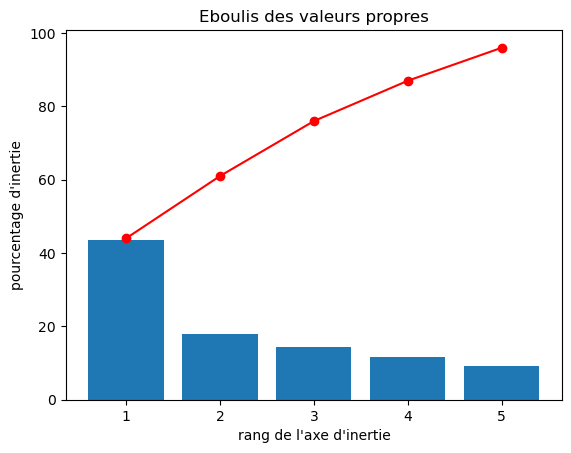

In [43]:
# Graphique des éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## 4.5. Composants

**<span style="color:blue"> c'est bien par un calcul que l'on obtient ces composantes. 
La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` : <span>** 

In [44]:
pcs = pca.components_
pcs

array([[ 0.4398592 ,  0.23227809,  0.36761603,  0.12805065,  0.04116066,
         0.54529104,  0.54954139],
       [-0.06361181, -0.26060553,  0.36104073, -0.69716632, -0.54487803,
         0.00135779,  0.12146233],
       [ 0.30087924, -0.72863679, -0.00727247, -0.19303777,  0.57630923,
        -0.01971708,  0.09339464],
       [-0.47001912,  0.32756715,  0.50873601, -0.27422281,  0.57819573,
        -0.04713376, -0.03520543],
       [-0.31317887, -0.440547  ,  0.53361931,  0.61858924, -0.18575114,
        -0.0735922 ,  0.02271179]])

In [45]:
#Affichons la même chose mais version `pandas` : 
pcs = pd.DataFrame(pcs)

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
F1,0.44,0.23,0.37,0.13,0.04,0.55,0.55
F2,-0.06,-0.26,0.36,-0.70,-0.54,0.00,0.12
F3,0.30,-0.73,-0.01,-0.19,0.58,-0.02,0.09
F4,-0.47,0.33,0.51,-0.27,0.58,-0.05,-0.04
F5,-0.31,-0.44,0.53,0.62,-0.19,-0.07,0.02


In [46]:
# Transposition du dataframe comme cela : 
pcs.T

,F1,F2,F3,F4,F5
Exportations - Quantité Milliers de tonnes,0.439859,-0.063612,0.300879,-0.470019,-0.313179
Importations - Quantité Milliers de tonnes,0.232278,-0.260606,-0.728637,0.327567,-0.440547
Population totale,0.367616,0.361041,-0.007272,0.508736,0.533619
Produit Intérieur Brut,0.128051,-0.697166,-0.193038,-0.274223,0.618589
Prix Déflateurs($),0.041161,-0.544878,0.576309,0.578196,-0.185751
Émissions CO2 (kt) Transport alim,0.545291,0.001358,-0.019717,-0.047134,-0.073592
Dispo de protéines en qtité (Milliers de tonnes/pop/an),0.549541,0.121462,0.093395,-0.035205,0.022712


**<span style="color:blue"> Un heatmap pour nous permettre de visualiser les variables qui ont une influence significative sur chaque composante principale, ainsi que la contribution de chaque individu à ces composantes. Il nous aide à identifier les variables importantes pour les analyses futures et à montrer visuellement les liens forts entre les variables ou individus et les composantes principales avant de visualiser le cercle de corrélation.<span>** 

<AxesSubplot:>

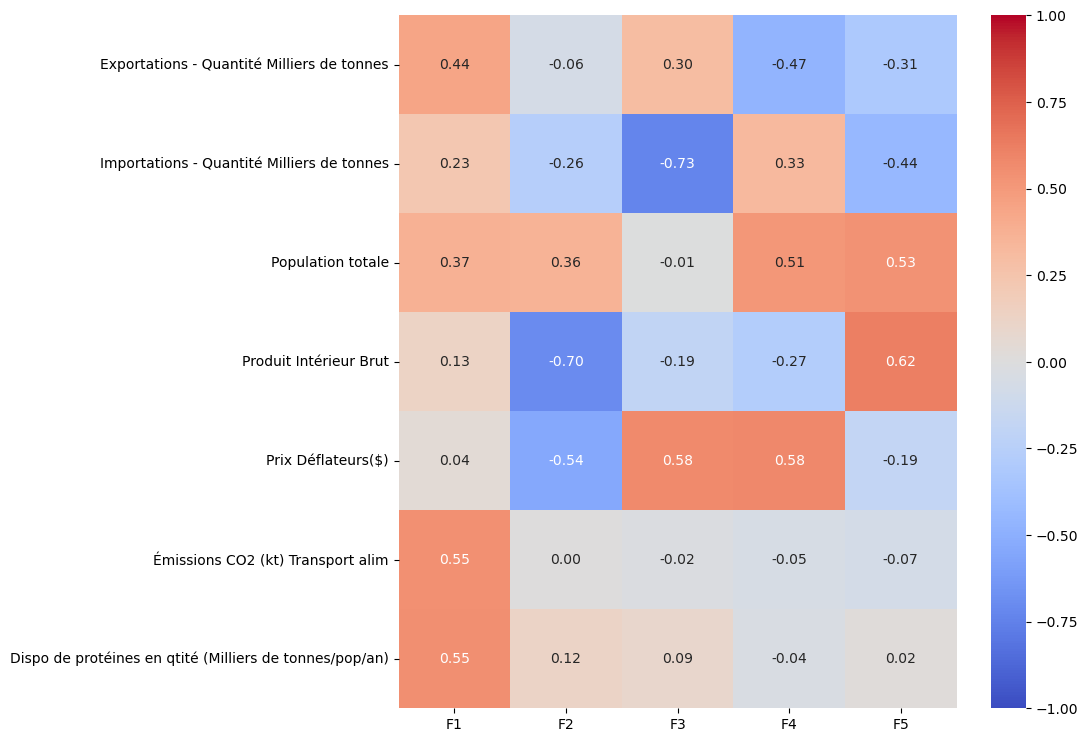

In [47]:
# Un heatmap 
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## 4.6. Cercle de corrélation

### 4.61. Représentation des variables

In [48]:
x, y = 0,1

In [108]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(22, 22))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.01,
                head_length=0.005, 
                width=0.001, 
                color="red")

        # Les labels
        plt.text(pca.components_[x, i] + 0.03,
                pca.components_[y, i] + 0.03,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)),fontsize = 18)
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)),fontsize = 18)

    #Titre 
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1),fontsize = 23)

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

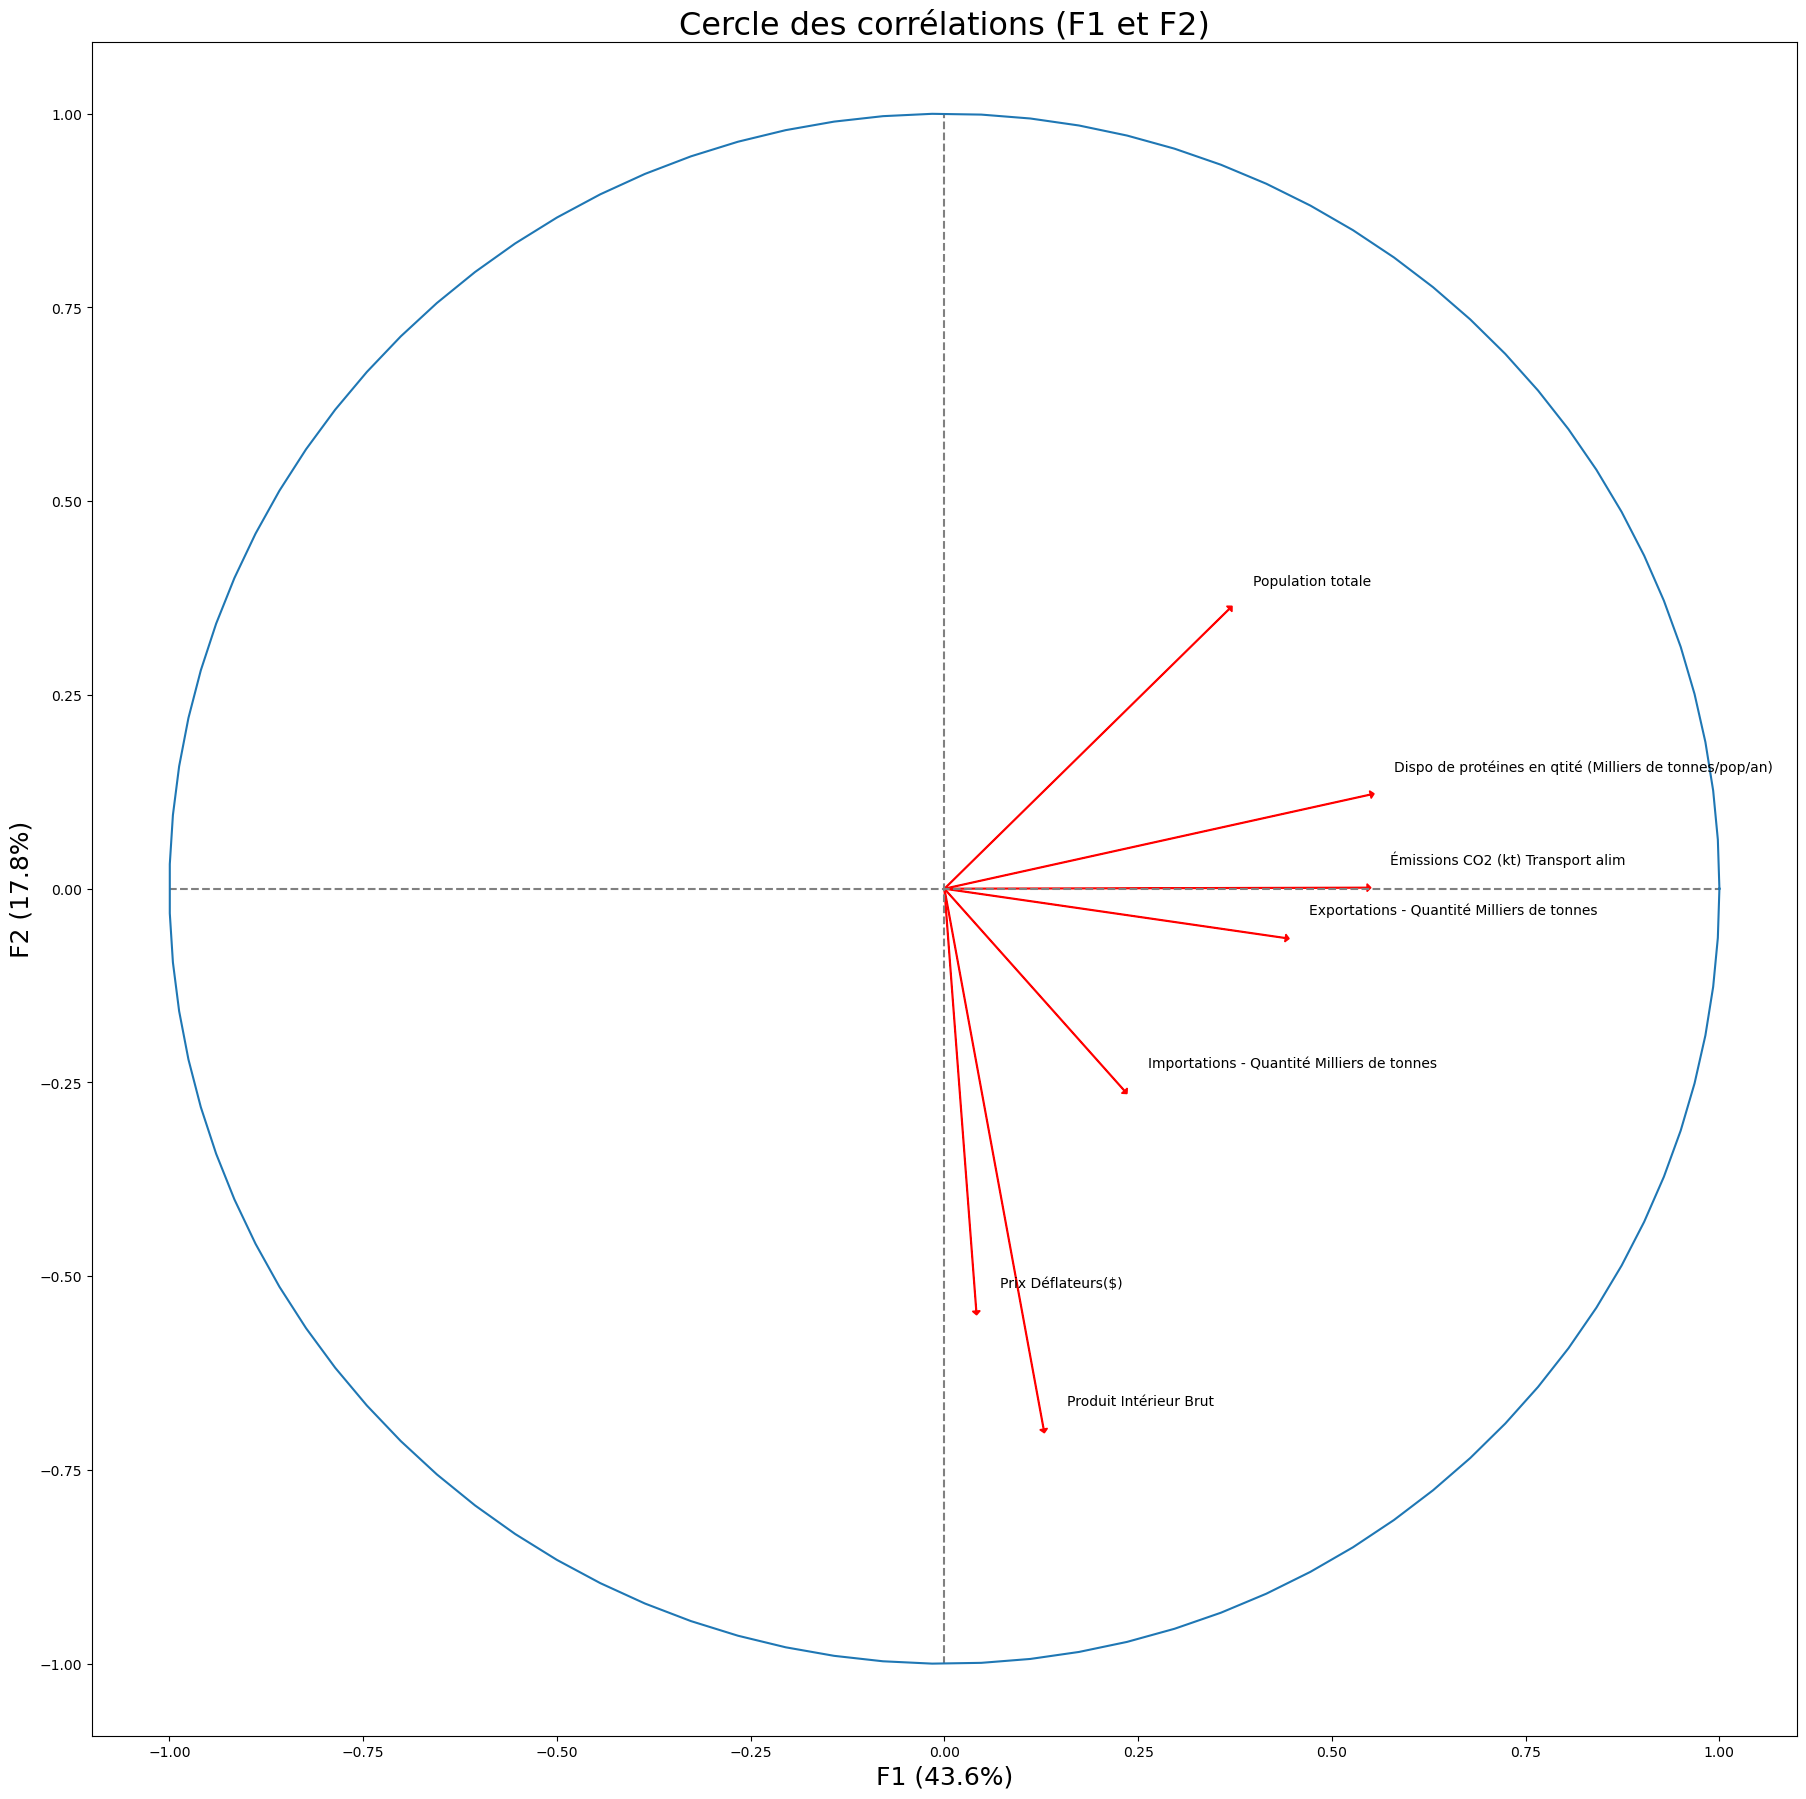

In [109]:
correlation_graph(pca, (0,1), features)

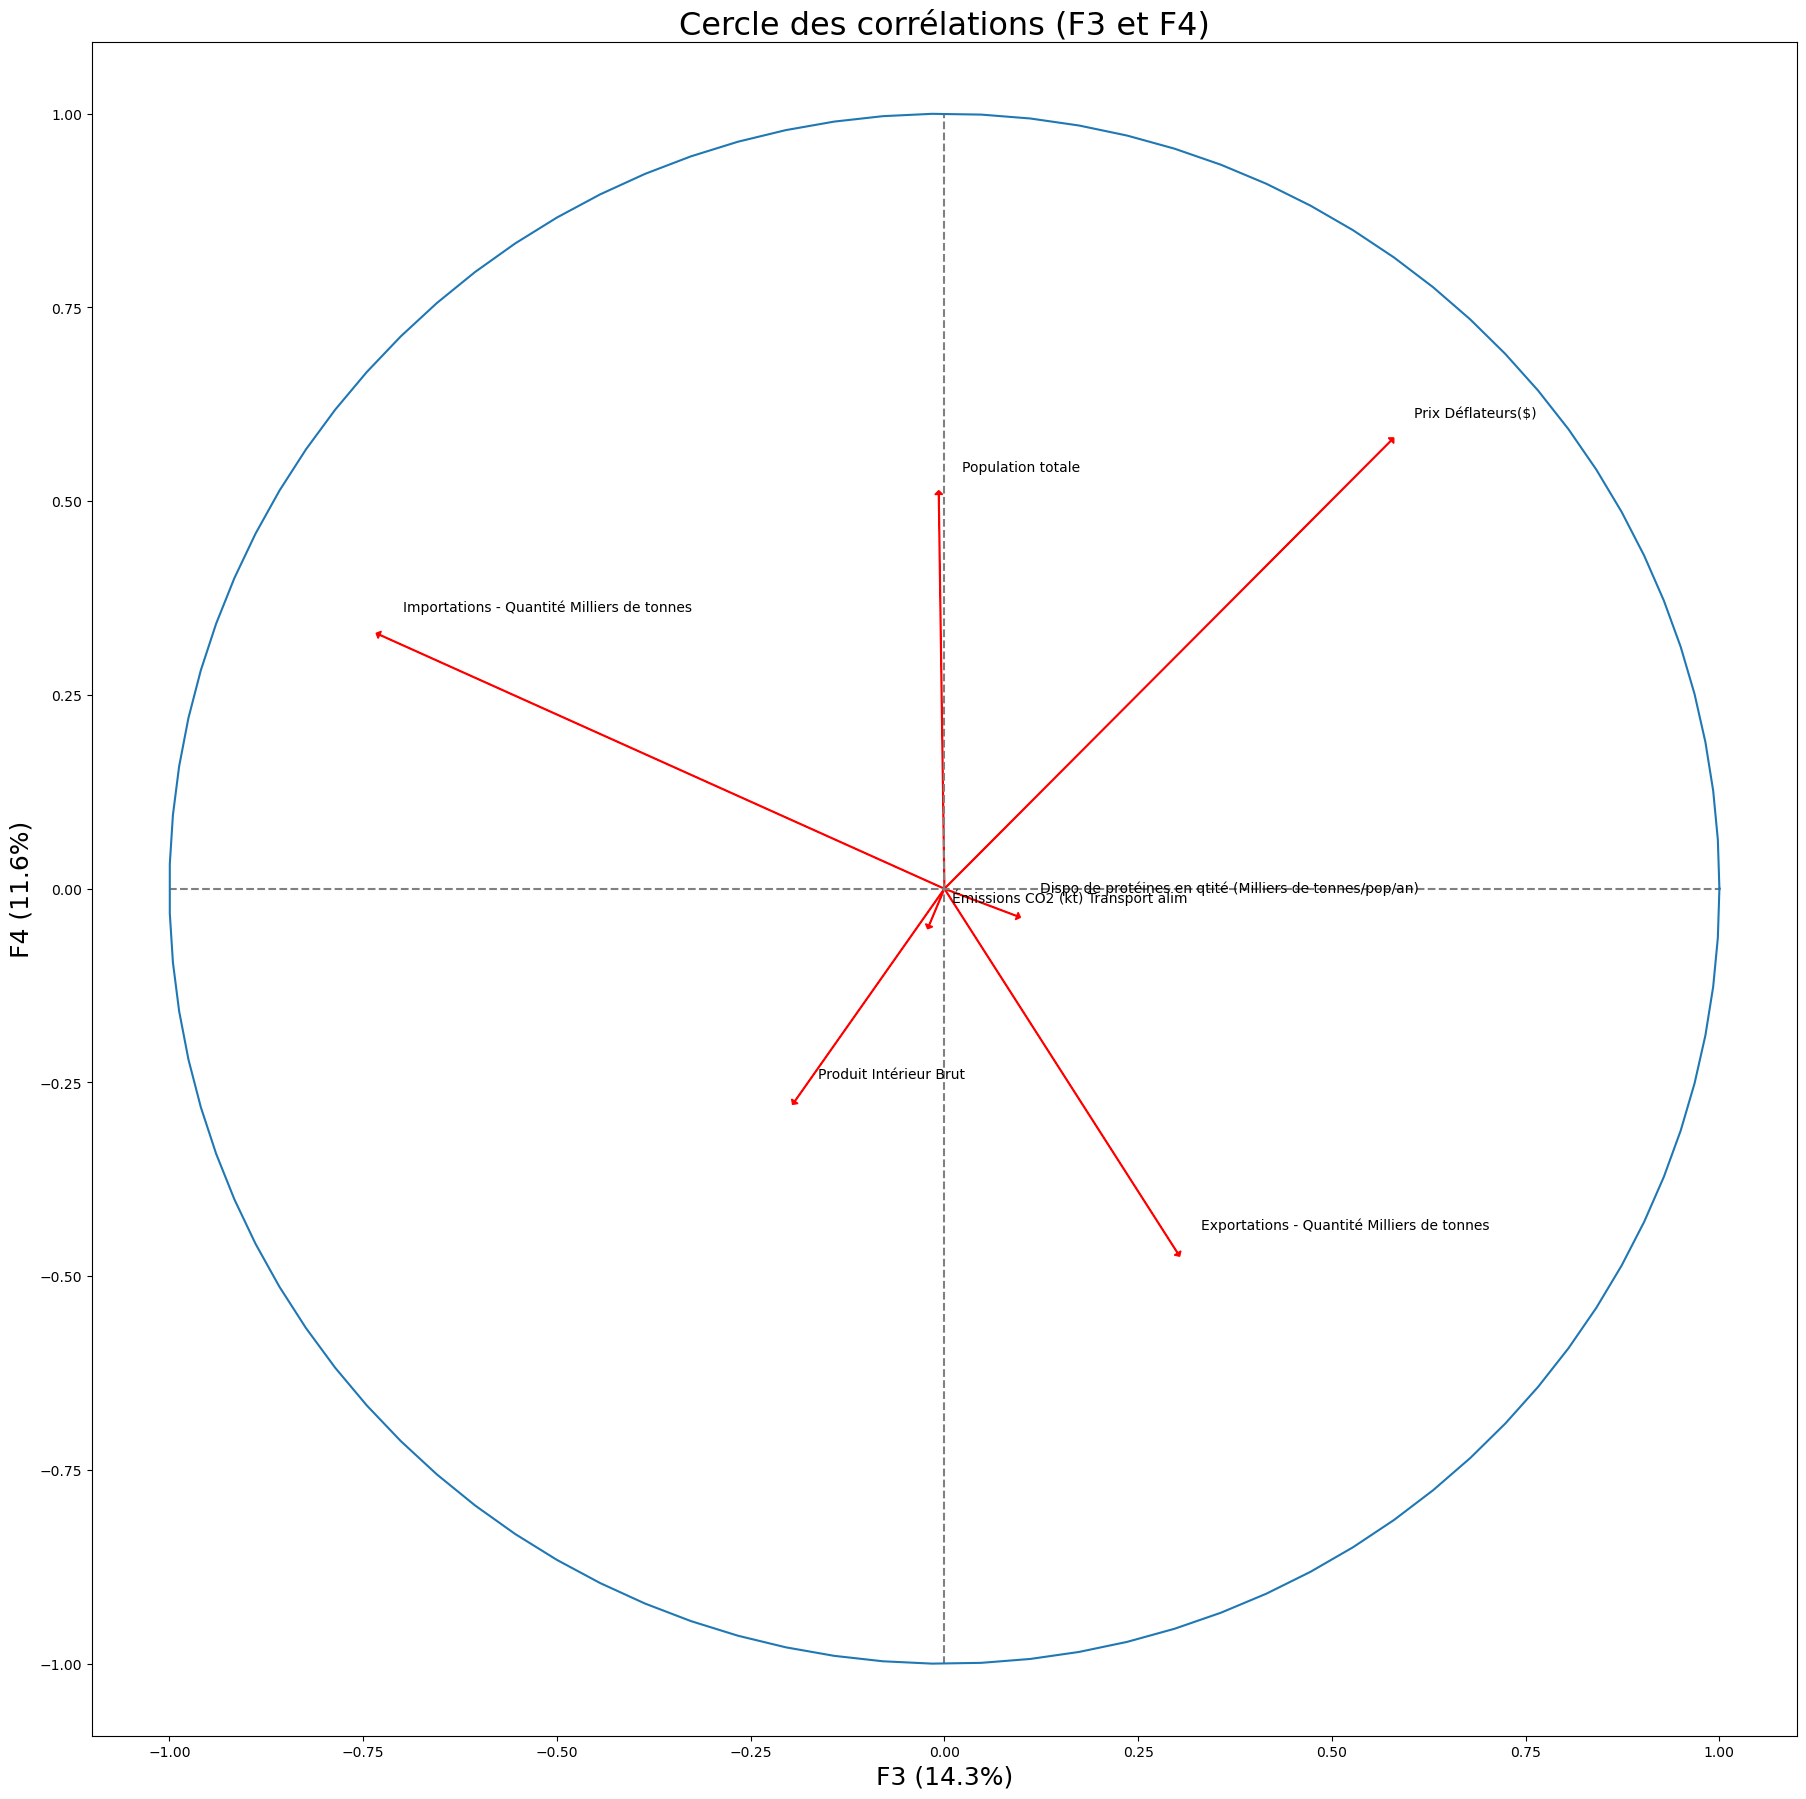

In [110]:
correlation_graph(pca, (2,3), features)

### 4.6.2. Représentation des individus

In [52]:
DispoAlim_Pop2017kmeans
DispoAlim_Pop2017ACP

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
Zone,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16
...,...,...,...,...,...,...,...
Égypte,1.0,110.0,96442590.0,1917.05,113.85,3959.4415,1.587590e+17
Émirats arabes unis,94.0,433.0,9487200.0,42522.38,199.19,3988.8191,5.124985e+16
Équateur,0.0,0.0,16785360.0,6246.40,208.50,1897.9459,3.767894e+16


In [53]:
X = DispoAlim_Pop2017ACP
X.head()

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
Zone,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16


In [54]:
# On instancie notre Kmeans avec 3 clusters : 
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300, random_state=42)

# On l'entraine : 
kmeans.fit(X)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels.sort()

In [55]:
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids

array([[3.70288462e+01, 5.90673077e+01, 1.29287137e+07, 1.56546242e+04,
        2.03555288e+02, 1.00959178e+03, 2.15238826e+16],
       [2.83033333e+03, 1.92666667e+02, 6.51313457e+08, 2.58951533e+04,
        2.08406667e+02, 3.88220113e+04, 1.86941075e+18],
       [1.63080000e+02, 2.80160000e+02, 1.34212602e+08, 1.80931948e+04,
        1.98552800e+02, 9.29177568e+03, 2.36811858e+17]])

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [57]:
pca = PCA(n_components=5)
pca.fit(X_scaled)

PCA(n_components=5)

In [58]:
X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2", "F3","F4","F5"])
X_proj

,F1,F2,F3,F4,F5
0,0.871161,-0.363802,-1.107137,1.114466,-1.221696
1,-0.760596,0.091933,0.542953,0.345821,-0.348607
2,-0.391823,0.850079,0.028441,-0.270533,0.001544
3,2.523987,-2.059038,-2.408855,0.569719,-1.142818
4,-0.314219,-0.518078,0.095905,1.224788,-0.936906
...,...,...,...,...,...
127,-0.135499,3.052345,-2.522390,-2.141903,0.600023
128,0.366677,-1.322458,-1.577489,-0.004691,-0.018209
129,-0.592503,0.237240,0.550633,0.168173,-0.146123
130,12.306208,-0.467946,2.267303,-3.615383,-0.520766


In [59]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4","F5"], 
                              index=["a", "b", "c"])
centroids_proj

,F1,F2,F3,F4,F5
a,-2.068385,0.621966,0.861758,-0.189726,-0.228783
b,2.925786,-1.082803,0.832316,0.311251,0.781067
c,-0.857401,0.460837,-1.694074,-0.121525,-0.552284


In [60]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


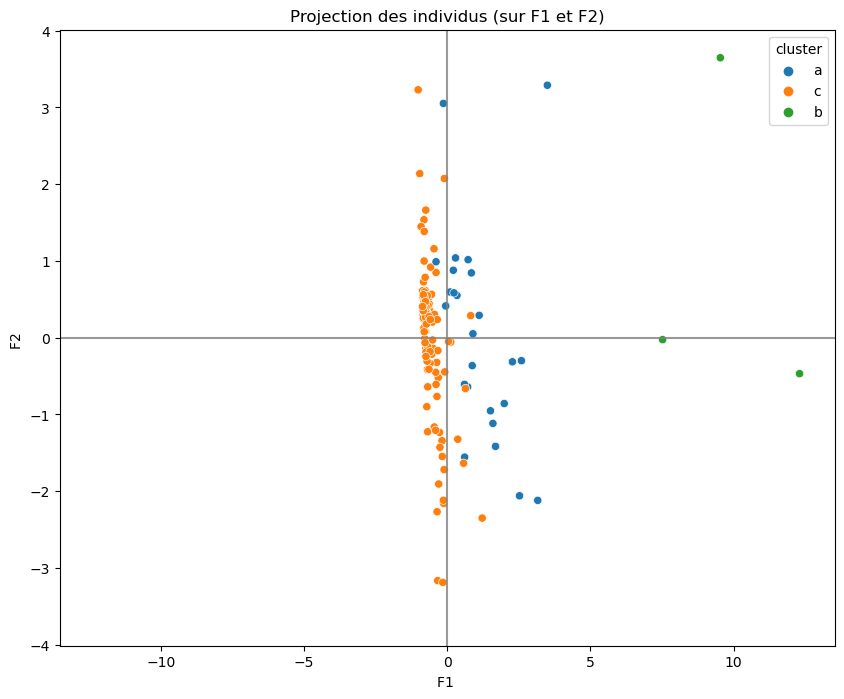

In [61]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=DispoAlim_Pop2017kmeans['cluster'])

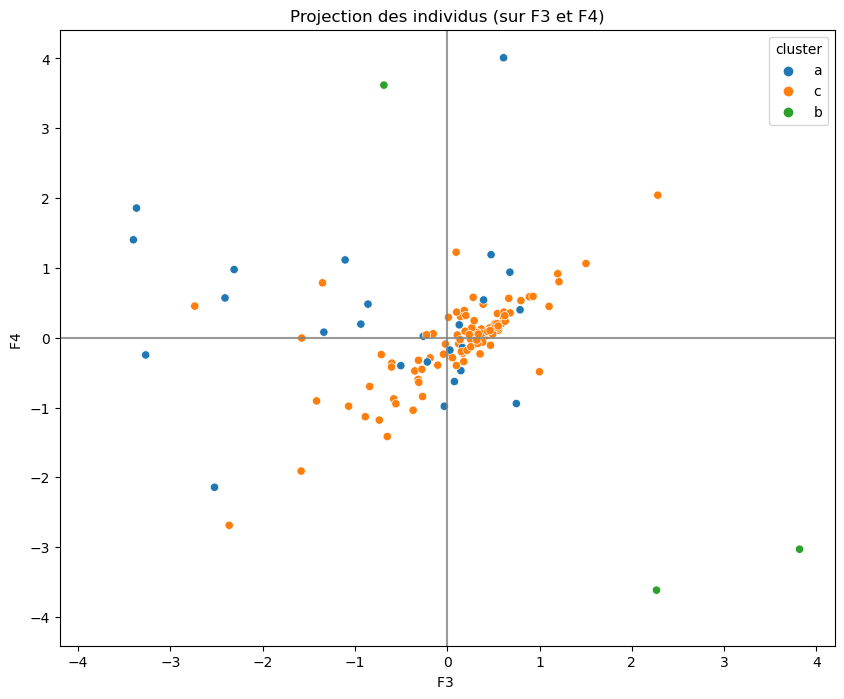

In [62]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, clusters=DispoAlim_Pop2017kmeans['cluster'])

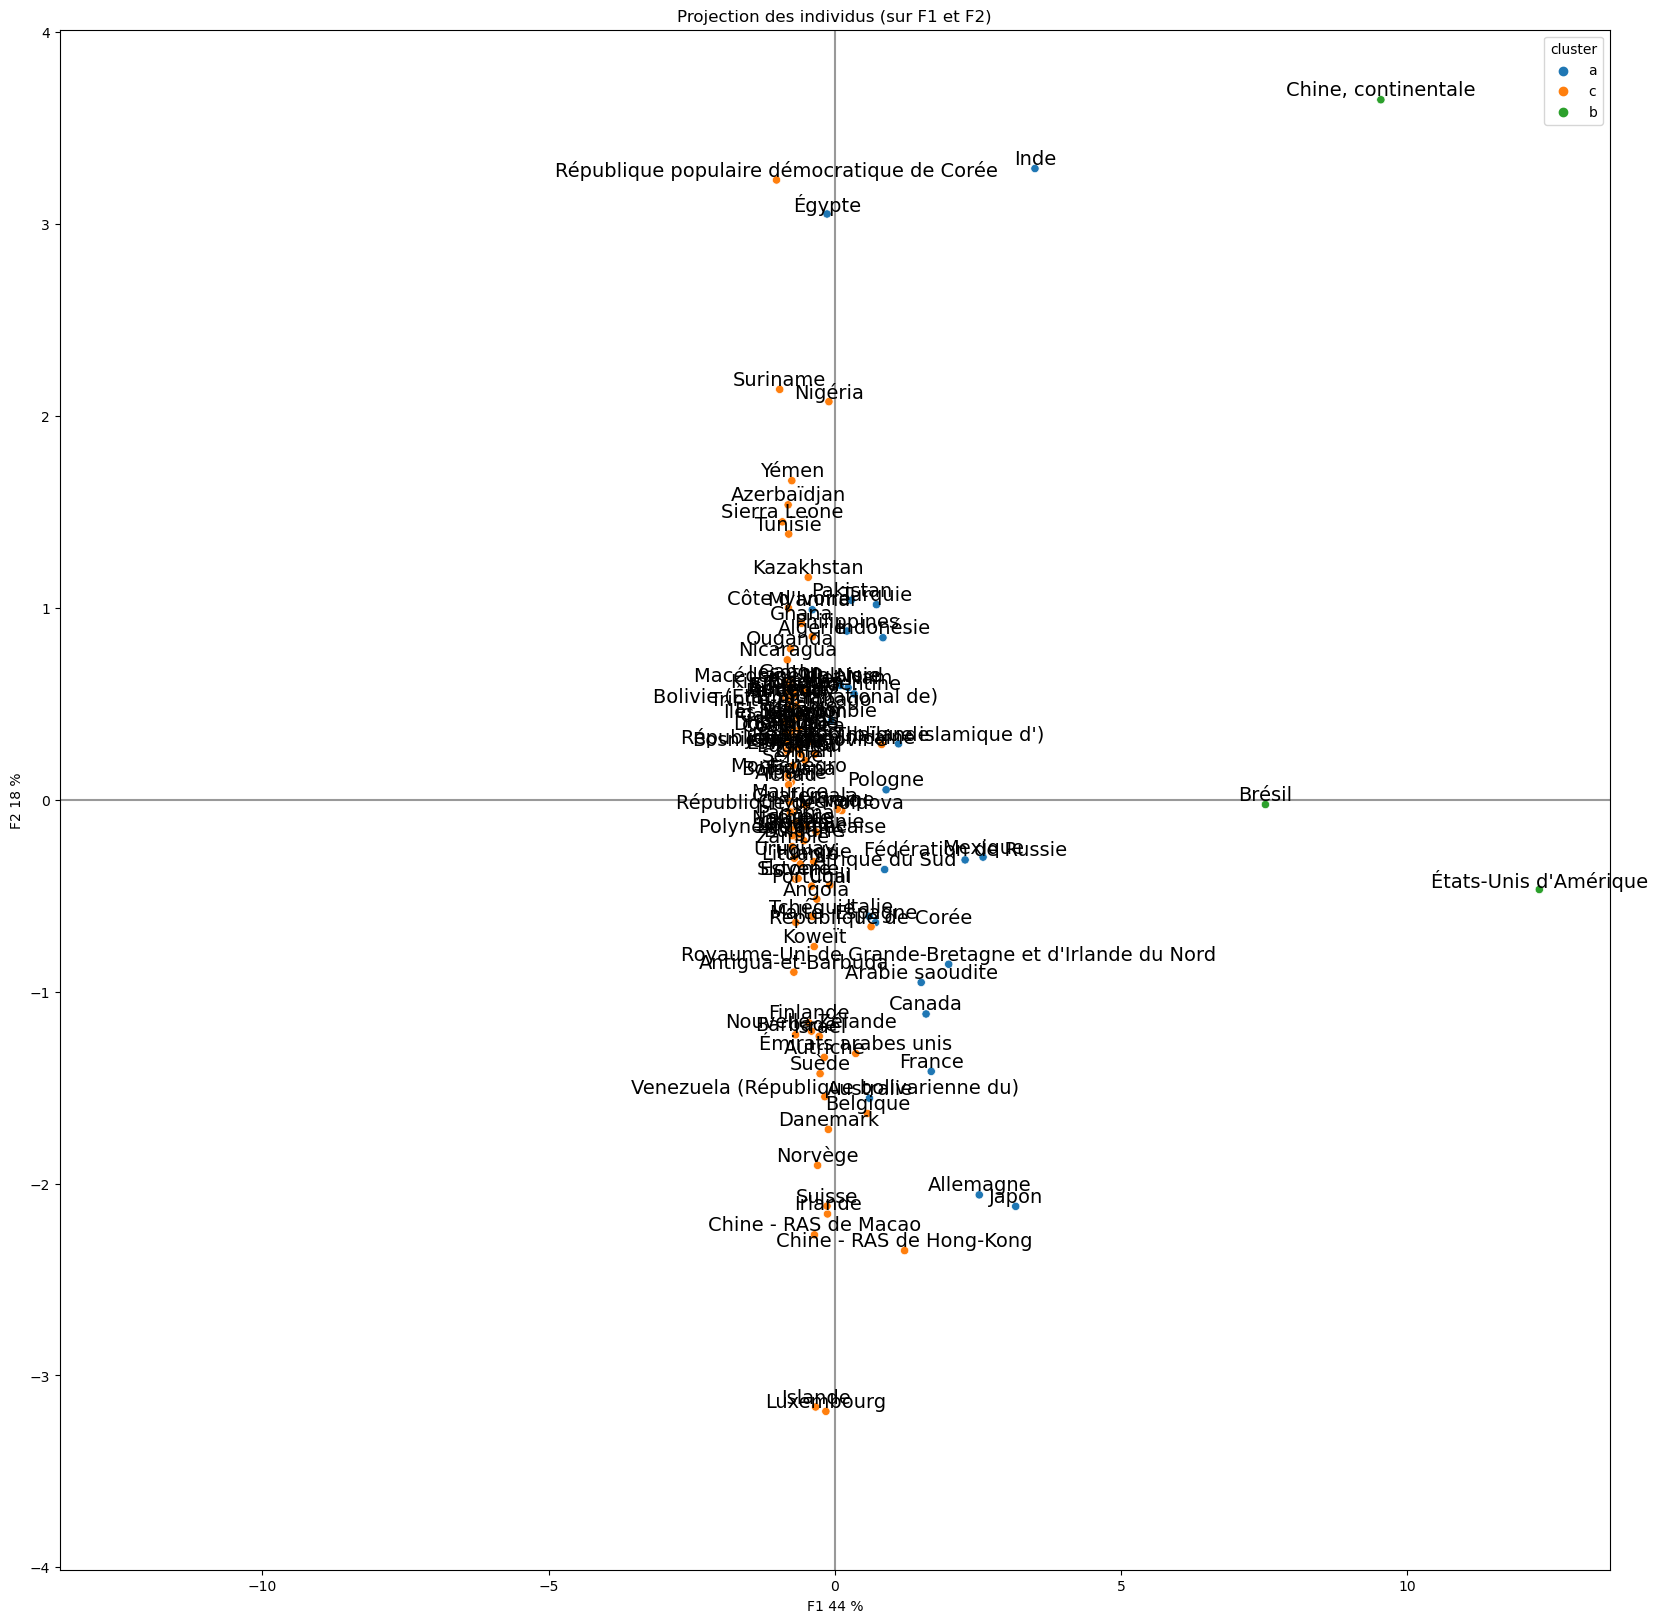

In [63]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), clusters=DispoAlim_Pop2017kmeans['cluster'], marker="o")

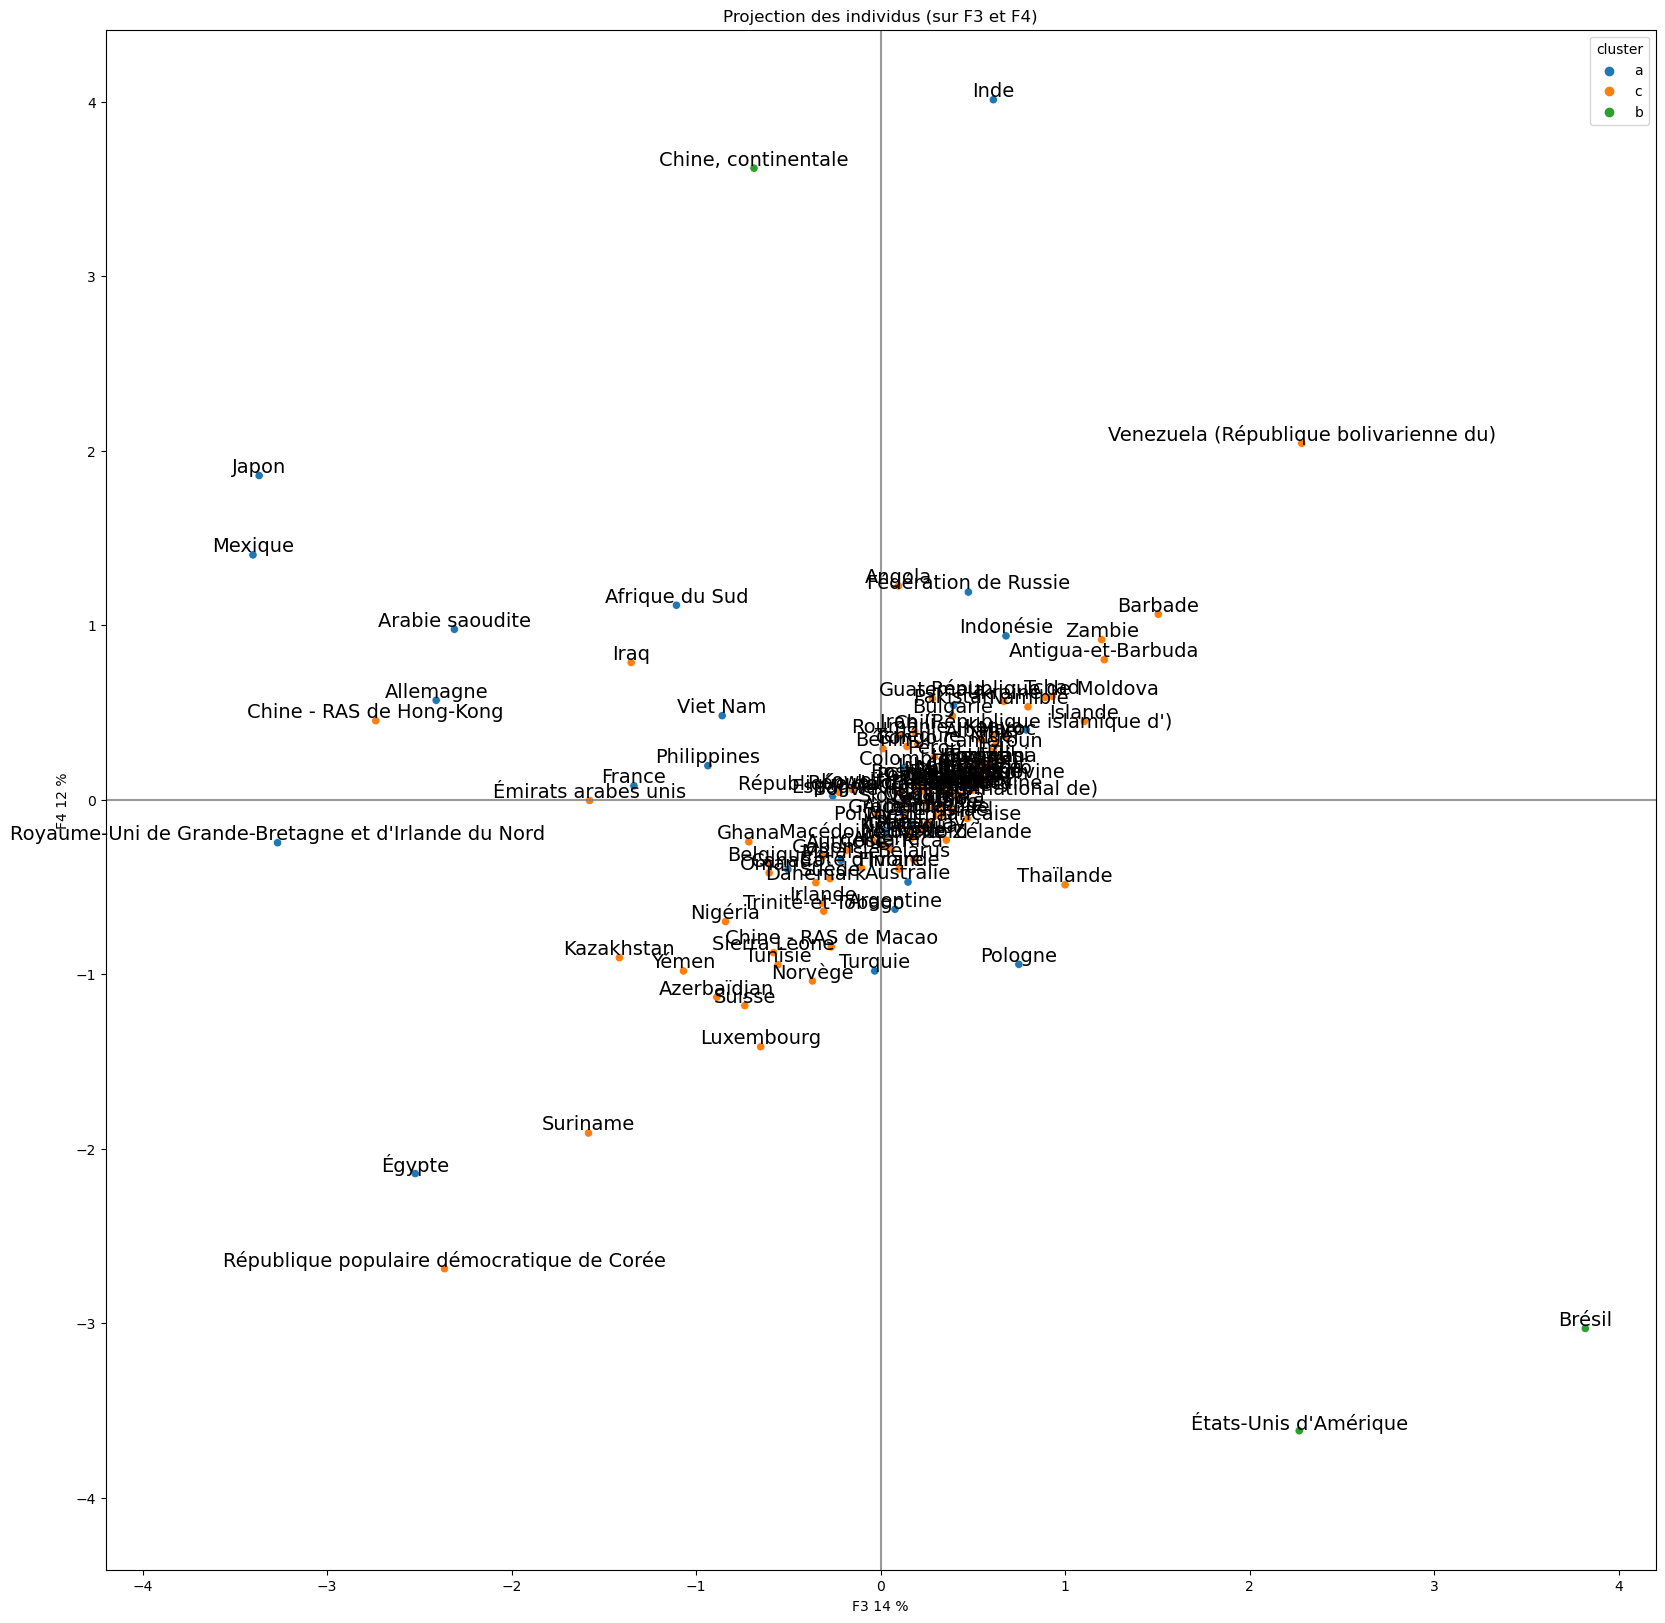

In [64]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), clusters=DispoAlim_Pop2017kmeans['cluster'], marker="o")

In [117]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)
    X__=np.array(centroids_proj)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
    ax.scatter(X__[:, x], X__[:, y], marker="s", c="black")
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}',fontsize = 10)
    ax.set_ylabel(f'F{y+1} {v2}',fontsize = 10)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

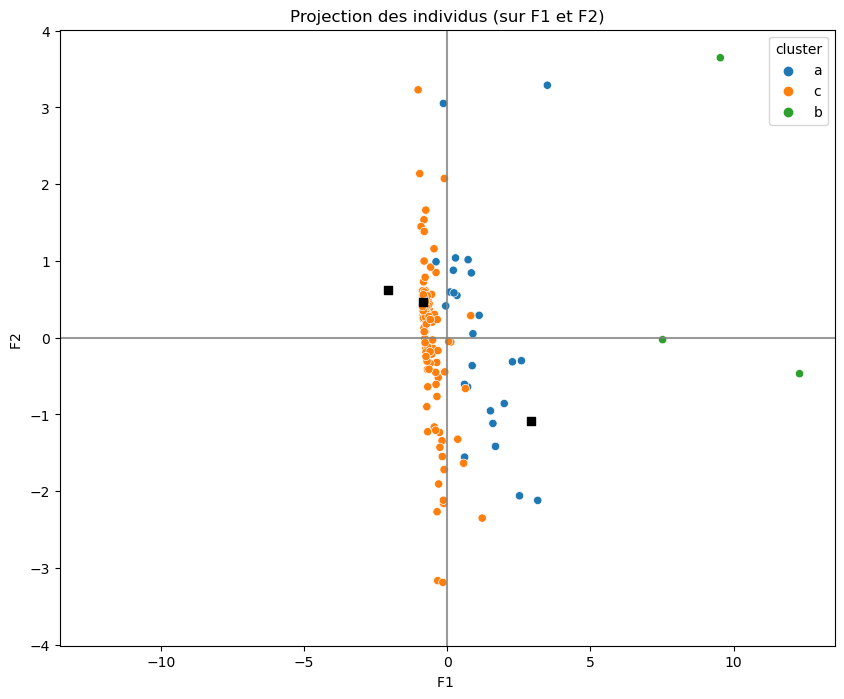

In [118]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=DispoAlim_Pop2017kmeans['cluster'])

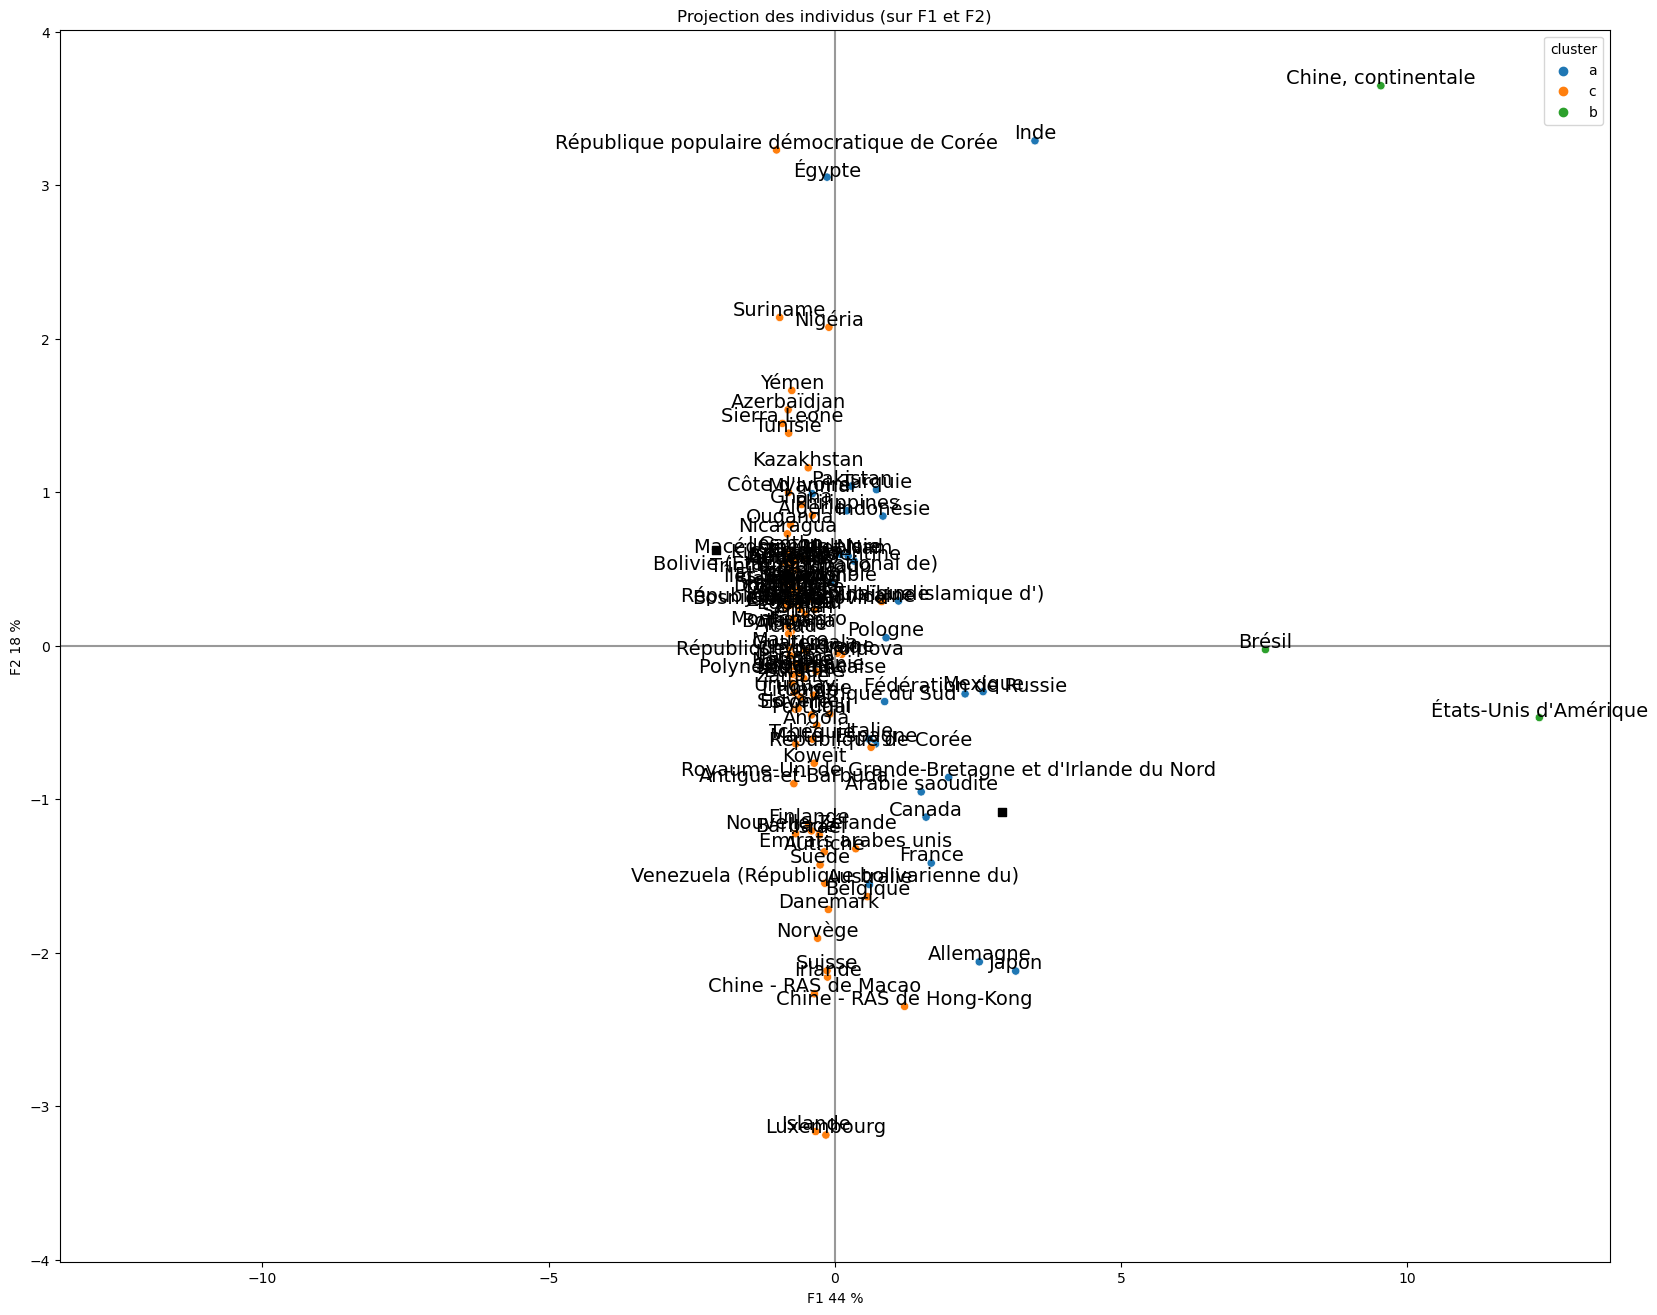

In [119]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=DispoAlim_Pop2017kmeans['cluster'], marker="o")

In [66]:
DispoAlim_Pop2017kmeans.head(5)

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster
Zone,,,,,,,,
Afrique du Sud,63.0,514.0,57009760.0,6723.93,212.12,5074.1555,2.936088e+17,a
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15,c
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16,c
Allemagne,646.0,842.0,82658410.0,44670.22,209.96,12647.7592,2.401557e+17,a
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16,c


In [67]:
DispoAlim_Pop2017kmeans.describe()

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
count,132.000000,132.000000,1.320000e+02,132.000000,132.000000,132.000000,1.320000e+02
mean,124.386364,103.977273,5.040789e+07,16349.214015,202.718106,3437.560389,1.042955e+17
std,507.036994,201.461396,1.733716e+08,20614.147126,19.953637,7171.165273,2.969745e+17
min,0.000000,0.000000,7.146000e+04,487.010000,106.380000,5.859400,3.004750e+14
25%,0.000000,3.000000,3.865700e+06,3511.422500,198.585000,231.349750,5.982603e+15
50%,2.500000,22.000000,9.815580e+06,6849.850000,205.925000,794.185750,2.021927e+16
75%,30.500000,108.500000,3.586896e+07,19176.435000,210.767500,3161.031575,8.270246e+16
max,4223.000000,1069.000000,1.421022e+09,110203.010000,271.690000,57457.448600,2.364813e+18


In [68]:
DispoAlim_Pop2017kmeansv2=DispoAlim_Pop2017kmeans.reset_index()

# Créez un dictionnaire pour stocker les pays par cluster
clusters_dict = {}

# Groupement des données par cluster
clustered_data = DispoAlim_Pop2017kmeansv2.groupby('cluster')

# Remplissez le dictionnaire avec les pays par cluster
for cluster, group in clustered_data:
    countries = list(group['Zone'])
    clusters_dict[f'Cluster {cluster}'] = countries

# Affichage des clusters sous forme de listes
for cluster, countries in clusters_dict.items():
    print(f'{cluster}: {countries}')
    print()

Cluster a: ['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Canada', 'Colombie', 'Espagne', 'France', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Italie', 'Japon', 'Malaisie', 'Mexique', 'Myanmar', 'Pakistan', 'Philippines', 'Pologne', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Turquie', 'Viet Nam', 'Égypte']

Cluster b: ['Brésil', 'Chine, continentale', "États-Unis d'Amérique"]

Cluster c: ['Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Barbade', 'Belgique', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Bélarus', 'Bénin', 'Cameroun', 'Chili', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'Gabon', 'Ghana', 'Grèce', 'Guatemala', 'Guyana', 'Géorgie', 'Honduras', 'Hongrie',

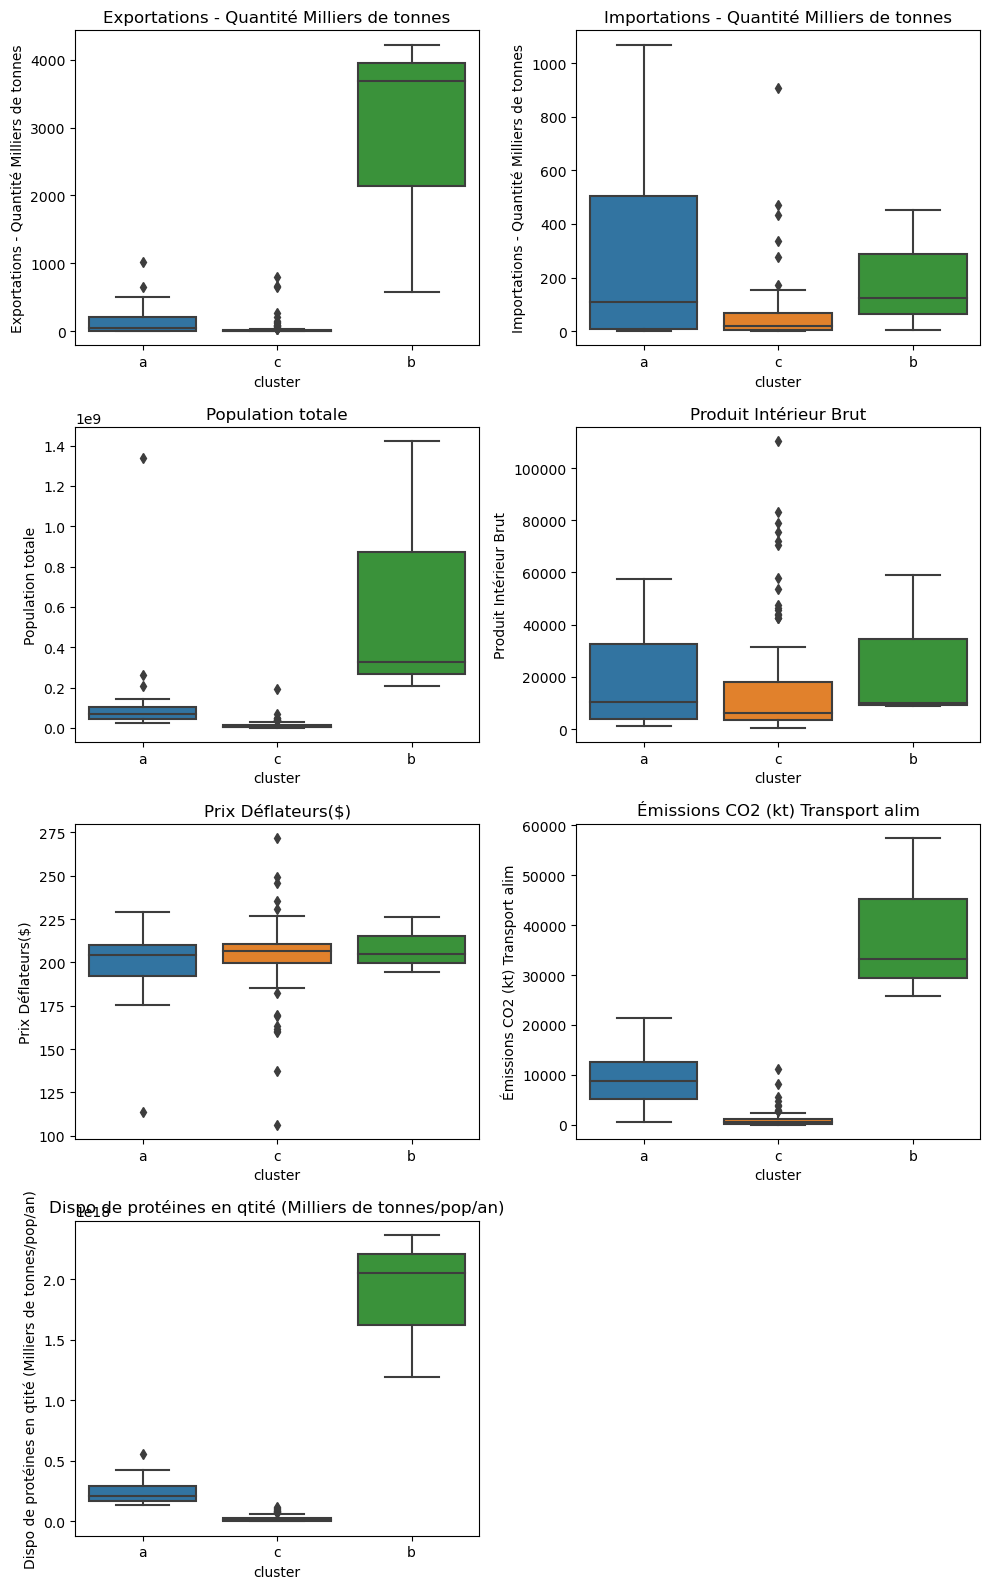

In [120]:
# Sélectionner uniquement les colonnes numériques
df_numeric = DispoAlim_Pop2017kmeans.select_dtypes(include=[np.number])

# Ajouter le type de publication aux données numériques
df_numeric['cluster'] = DispoAlim_Pop2017kmeans['cluster']

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) - 1  # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns.drop('cluster'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster', y=column, data=df_numeric)
    plt.title(column)

plt.tight_layout()
plt.show()

In [74]:
DispoAlim_Pop2017kmeans.groupby("cluster").mean()

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
cluster,,,,,,,
a,163.080000,280.160000,1.342126e+08,18093.194800,198.552800,9291.775676,2.368119e+17
b,2830.333333,192.666667,6.513135e+08,25895.153333,208.406667,38822.011333,1.869411e+18
c,37.028846,59.067308,1.292871e+07,15654.624231,203.555288,1009.591783,2.152388e+16


In [75]:
Cluster_A= DispoAlim_Pop2017kmeans.loc[DispoAlim_Pop2017kmeans['cluster']=="a"]
Cluster_A

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster
Zone,,,,,,,,
Afrique du Sud,63.0,514.0,5.700976e+07,6723.93,212.12,5074.1555,2.936088e+17,a
Allemagne,646.0,842.0,8.265841e+07,44670.22,209.96,12647.7592,2.401557e+17,a
Arabie saoudite,10.0,722.0,3.310118e+07,20138.15,204.01,13245.2928,1.881157e+17,a
Argentine,207.0,8.0,4.393714e+07,14609.78,190.14,6294.7857,2.169814e+17,a
Australie,42.0,16.0,2.458462e+07,57430.80,211.88,9683.0591,1.489582e+17,a
Canada,163.0,182.0,3.673210e+07,45125.11,204.22,18709.3917,1.858240e+17,a
Colombie,2.0,78.0,4.890984e+07,6450.32,202.55,3746.1254,1.708445e+17,a
Espagne,212.0,205.0,4.664743e+07,28190.81,207.57,6604.8822,2.123181e+17,a
France,501.0,506.0,6.484251e+07,40458.15,206.49,10026.5927,2.118243e+17,a


In [77]:
Cluster_B= DispoAlim_Pop2017kmeans.loc[DispoAlim_Pop2017kmeans['cluster']=="b"]
Cluster_B

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster
Zone,,,,,,,,
Brésil,4223.0,3.0,2.078338e+08,9896.72,225.99,25855.2017,1.189475e+18,b
"Chine, continentale",576.0,452.0,1.421022e+09,8729.14,194.45,33153.3837,2.053945e+18,b
États-Unis d'Amérique,3692.0,123.0,3.250848e+08,59059.60,204.78,57457.4486,2.364813e+18,b


In [78]:
Cluster_C= DispoAlim_Pop2017kmeans.loc[DispoAlim_Pop2017kmeans['cluster']=="c"]
Cluster_C.head(60)

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster
Zone,,,,,,,,
Albanie,0.0,38.0,2884170.0,4521.75,212.60,293.4213,6.590040e+15,c
Algérie,0.0,2.0,41389190.0,4134.94,190.44,4665.7869,2.976090e+16,c
Angola,0.0,277.0,29816770.0,4042.68,226.67,630.9218,3.917924e+16,c
Antigua-et-Barbuda,0.0,7.0,95430.0,16110.56,235.55,20.2163,6.189638e+14,c
Arménie,0.0,35.0,2944790.0,4042.00,197.62,196.1143,5.847175e+15,c
Autriche,78.0,110.0,8819900.0,47429.54,208.75,1879.2876,2.411228e+16,c
Azerbaïdjan,0.0,27.0,9845320.0,4057.62,161.66,749.6302,1.599126e+16,c
Barbade,0.0,2.0,286230.0,17843.20,245.57,46.1256,1.601586e+15,c
Belgique,656.0,338.0,11419750.0,44162.26,210.13,1985.0684,1.904871e+16,c


# 3. Sélection des outliers du cluster "c"

In [122]:
# Calculer les quartiles
Q1 = Cluster_C['Produit Intérieur Brut'].quantile(0.25)
Q2 = Cluster_C['Produit Intérieur Brut'].quantile(0.5)
Q3 = Cluster_C['Produit Intérieur Brut'].quantile(0.75)

# Calculer l'interquartile
IQR = Q3 - Q1

print("Premier quartile : ", Q1)
print("Deuxième quartile (médiane) : ", Q2)
print("Troisième quartile : ", Q3)
print("Interquartile : ", IQR)

Premier quartile :  3322.4
Deuxième quartile (médiane) :  6233.69
Troisième quartile :  18055.055
Interquartile :  14732.655


In [123]:
# Calcul des valeurs limites
Xmin=Q1-(1.5*IQR)
Xmax=Q3+(1.5*IQR)

print("Le prix minimal est de :",round(Xmin,2))
print("Le prix maximal est de :",Xmax)

Le prix minimal est de : -18776.58
Le prix maximal est de : 40154.037500000006


In [127]:
# Recherche des outliers en cherchant qui sont au-dessus de la limite supérieure et en-dessous de la limite inférieure
ValeursExtremes=Cluster_C.dropna()
ValeursExtremes=Cluster_C[(Cluster_C['Produit Intérieur Brut']>Xmax)|(Cluster_C['Produit Intérieur Brut']<Xmin)]


# Affichage du nombre d'outliers
print("Nombres d'outliers détectés: "+ str(len(ValeursExtremes)))
print(list(ValeursExtremes['Produit Intérieur Brut']))

Nombres d'outliers détectés: 15
[47429.54, 44162.26, 45737.48, 78985.63, 57888.2, 46412.76, 70491.99, 71961.53, 42756.83, 110203.01, 75490.69, 43534.09, 83353.6, 53788.88, 42522.38]


In [128]:
# Création d'une colonne prix aberrants (outliers) permettant de calculer les outliers
Cluster_C['PIB élevés']=Cluster_C['Produit Intérieur Brut'][Cluster_C['Produit Intérieur Brut']>Xmax]

C:\Users\bello\AppData\Local\Temp\ipykernel_83484\370928892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_C['PIB élevés']=Cluster_C['Produit Intérieur Brut'][Cluster_C['Produit Intérieur Brut']>Xmax]


In [132]:
# Création d'un dataframe PrixEleve "A" eneque les "prix aberrants" qui sont au-dessus de la limite supérieure Xmax.
ClusterC_PIB_Eleves=Cluster_C.loc[Cluster_C['PIB élevés']>=(Cluster_C['Produit Intérieur Brut']>Xmax)]
ClusterC_PIB_Eleves

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),cluster,PIB élevés
Zone,,,,,,,,,
Autriche,78.0,110.0,8819900.0,47429.54,208.75,1879.2876,2.411228e+16,c,47429.54
Belgique,656.0,338.0,11419750.0,44162.26,210.13,1985.0684,1.904871e+16,c,44162.26
Chine - RAS de Hong-Kong,663.0,907.0,7306320.0,45737.48,207.54,857.1471,5.936312e+16,c,45737.48
Chine - RAS de Macao,0.0,23.0,622580.0,78985.63,206.92,58.3209,2.704176e+15,c,78985.63
Danemark,139.0,133.0,5732270.0,57888.20,207.93,954.7170,2.713685e+16,c,57888.20
Finlande,12.0,16.0,5511370.0,46412.76,207.82,919.5141,1.583169e+16,c,46412.76
Irlande,93.0,99.0,4753280.0,70491.99,210.03,912.8386,2.012539e+16,c,70491.99
Islande,0.0,2.0,334390.0,71961.53,249.31,112.6730,1.504905e+15,c,71961.53
Israël,3.0,0.0,8243850.0,42756.83,216.93,1979.3783,8.386098e+16,c,42756.83


In [137]:
DispoAlim_Pop2017kmeans.groupby("cluster").mean()

,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an)
cluster,,,,,,,
a,163.080000,280.160000,1.342126e+08,18093.194800,198.552800,9291.775676,2.368119e+17
b,2830.333333,192.666667,6.513135e+08,25895.153333,208.406667,38822.011333,1.869411e+18
c,37.028846,59.067308,1.292871e+07,15654.624231,203.555288,1009.591783,2.152388e+16


In [138]:
ClusterC_PIB_Eleves.describe()

,level_0,index,Exportations - Quantité Milliers de tonnes,Importations - Quantité Milliers de tonnes,Population totale,Produit Intérieur Brut,Prix Déflateurs($),Émissions CO2 (kt) Transport alim,Dispo de protéines en qtité (Milliers de tonnes/pop/an),PIB élevés
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.00000,15.000000,15.000000,1.500000e+01,15.00000
mean,7.000000,7.000000,119.266667,147.333333,6.078792e+06,60981.25800,209.419333,1339.576560,2.585876e+16,60981.25800
std,4.472136,4.472136,223.711379,246.248616,3.502258e+06,20033.37674,12.360132,968.461761,2.269855e+16,20033.37674
min,0.000000,0.000000,0.000000,0.000000,3.343900e+05,42522.38000,195.570000,58.320900,1.504905e+15,42522.38000
25%,3.500000,3.500000,2.000000,6.500000,4.727655e+06,44949.87000,203.965000,884.992850,1.546483e+16,44949.87000
50%,7.000000,7.000000,23.000000,51.000000,5.732270e+06,53788.88000,207.820000,1155.363600,2.012539e+16,53788.88000
75%,10.500000,10.500000,93.500000,121.500000,8.637850e+06,73726.11000,210.080000,1829.605700,2.638462e+16,73726.11000
max,14.000000,14.000000,663.000000,907.000000,1.141975e+07,110203.01000,249.310000,3988.819100,8.386098e+16,110203.01000
